# L0 Sparse Optimization Problem Visualization

This notebook illustrates the **L0 regularization problem**:

$$\min_{\underline{x}} \|\underline{y} - A\underline{x}\|_2^2 + \lambda \ell_0(\underline{x})$$

where:
- $\underline{y} \in \mathbb{R}^m$ is the observation vector
- $A \in \mathbb{R}^{m \times n}$ is the measurement/sensing matrix
- $\underline{x} \in \mathbb{R}^n$ is the sparse signal to recover
- $\ell_0(\underline{x}) = \|\underline{x}\|_0$ counts the number of non-zero elements in $\underline{x}$
- $\lambda > 0$ is the regularization parameter controlling sparsity

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## 1. Understanding the L0 "Norm"

The L0 pseudo-norm counts non-zero elements:
$$\|\underline{x}\|_0 = \sum_{i=1}^{n} \mathbf{1}(x_i \neq 0)$$

**Note:** This is not a true norm (violates homogeneity), but is fundamental for sparsity.

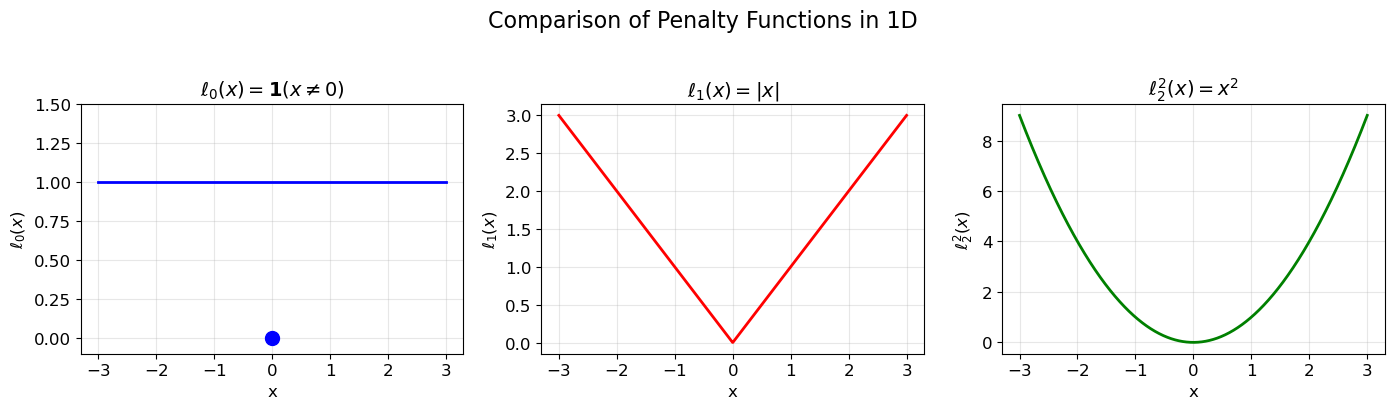

In [2]:
def l0_norm(x):
    """Count non-zero elements (L0 pseudo-norm)"""
    return np.sum(x != 0)

def l1_norm(x):
    """L1 norm - convex relaxation of L0"""
    return np.sum(np.abs(x))

def l2_norm_squared(x):
    """Squared L2 norm"""
    return np.sum(x**2)

# Visualize L0 vs L1 in 1D
x = np.linspace(-3, 3, 1000)
l0_values = np.where(x != 0, 1, 0)
l1_values = np.abs(x)
l2_values = x**2

fig, axes = plt.subplots(1, 3, figsize=(14, 4))

axes[0].plot(x, l0_values, 'b-', linewidth=2)
axes[0].scatter([0], [0], color='blue', s=100, zorder=5)
axes[0].set_title(r'$\ell_0(x) = \mathbf{1}(x \neq 0)$', fontsize=14)
axes[0].set_xlabel('x')
axes[0].set_ylabel(r'$\ell_0(x)$')
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim(-0.1, 1.5)

axes[1].plot(x, l1_values, 'r-', linewidth=2)
axes[1].set_title(r'$\ell_1(x) = |x|$', fontsize=14)
axes[1].set_xlabel('x')
axes[1].set_ylabel(r'$\ell_1(x)$')
axes[1].grid(True, alpha=0.3)

axes[2].plot(x, l2_values, 'g-', linewidth=2)
axes[2].set_title(r'$\ell_2^2(x) = x^2$', fontsize=14)
axes[2].set_xlabel('x')
axes[2].set_ylabel(r'$\ell_2^2(x)$')
axes[2].grid(True, alpha=0.3)

plt.suptitle('Comparison of Penalty Functions in 1D', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## 1.1 How L0 Counts: The Indicator Function

In practice, the L0 "norm" uses an indicator function with threshold $\epsilon$:

$$\#(x_j) = \begin{cases} 0 & \text{if } |x_j| < \epsilon \\ 1 & \text{otherwise} \end{cases}$$

Then: $\|\underline{x}\|_0 = \sum_{j=1}^{n} \#(x_j)$

This threshold $\epsilon$ is crucial for numerical stability since exact zeros rarely occur in practice.

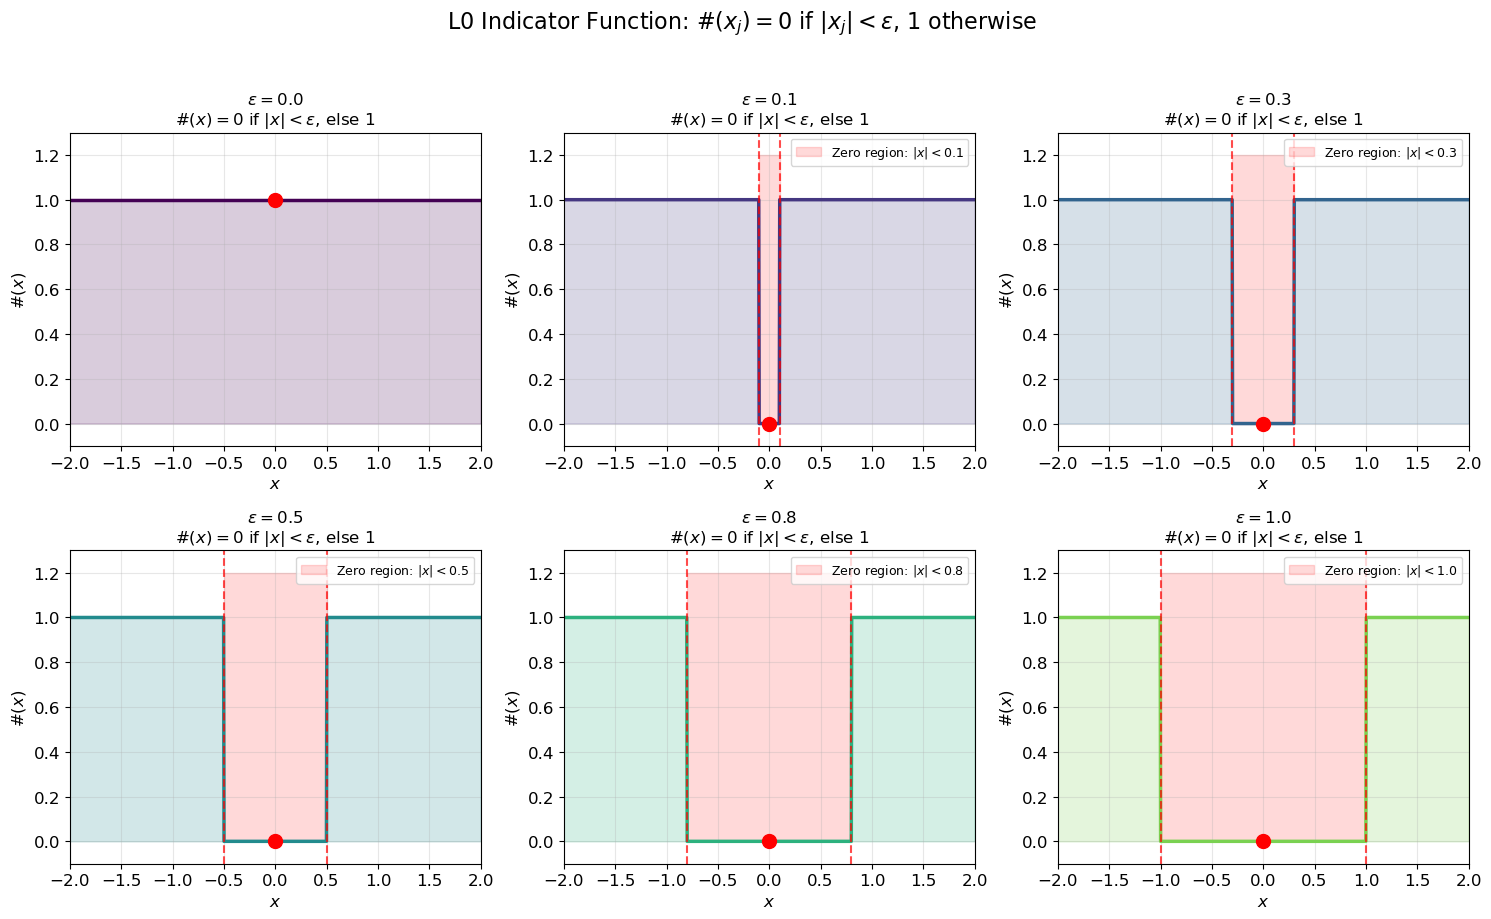

In [3]:
# Visualize the indicator function #(x_j) with different epsilon thresholds

def indicator_l0(x, epsilon):
    """
    Indicator function for L0:
    #(x_j) = 0 if |x_j| < epsilon, 1 otherwise
    """
    return np.where(np.abs(x) < epsilon, 0, 1)

# Create figure
fig, axes = plt.subplots(2, 3, figsize=(15, 9))

x = np.linspace(-2, 2, 1000)
epsilons = [0.0, 0.1, 0.3, 0.5, 0.8, 1.0]
colors = plt.cm.viridis(np.linspace(0, 0.8, len(epsilons)))

# Top row: Individual indicator functions for different epsilon
for idx, (eps, color) in enumerate(zip(epsilons[:3], colors[:3])):
    ax = axes[0, idx]
    y = indicator_l0(x, eps)
    ax.plot(x, y, color=color, linewidth=2.5)
    ax.fill_between(x, 0, y, alpha=0.2, color=color)
    
    # Mark the threshold region
    if eps > 0:
        ax.axvline(-eps, color='red', linestyle='--', alpha=0.7, linewidth=1.5)
        ax.axvline(eps, color='red', linestyle='--', alpha=0.7, linewidth=1.5)
        ax.fill_betweenx([0, 1.2], -eps, eps, alpha=0.15, color='red', 
                         label=f'Zero region: $|x|<{eps}$')
    
    ax.scatter([0], [0 if eps > 0 else 1], color='red', s=100, zorder=5)
    ax.set_xlabel('$x$', fontsize=12)
    ax.set_ylabel(r'$\#(x)$', fontsize=12)
    ax.set_title(f'$\\epsilon = {eps}$\n' + r'$\#(x)=0$ if $|x|<\epsilon$, else $1$', fontsize=12)
    ax.set_ylim(-0.1, 1.3)
    ax.set_xlim(-2, 2)
    ax.grid(True, alpha=0.3)
    if eps > 0:
        ax.legend(loc='upper right', fontsize=9)

for idx, (eps, color) in enumerate(zip(epsilons[3:], colors[3:])):
    ax = axes[1, idx]
    y = indicator_l0(x, eps)
    ax.plot(x, y, color=color, linewidth=2.5)
    ax.fill_between(x, 0, y, alpha=0.2, color=color)
    
    # Mark the threshold region
    ax.axvline(-eps, color='red', linestyle='--', alpha=0.7, linewidth=1.5)
    ax.axvline(eps, color='red', linestyle='--', alpha=0.7, linewidth=1.5)
    ax.fill_betweenx([0, 1.2], -eps, eps, alpha=0.15, color='red',
                     label=f'Zero region: $|x|<{eps}$')
    
    ax.scatter([0], [0], color='red', s=100, zorder=5)
    ax.set_xlabel('$x$', fontsize=12)
    ax.set_ylabel(r'$\#(x)$', fontsize=12)
    ax.set_title(f'$\\epsilon = {eps}$\n' + r'$\#(x)=0$ if $|x|<\epsilon$, else $1$', fontsize=12)
    ax.set_ylim(-0.1, 1.3)
    ax.set_xlim(-2, 2)
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper right', fontsize=9)

plt.suptitle(r'L0 Indicator Function: $\#(x_j) = 0$ if $|x_j| < \epsilon$, $1$ otherwise', 
             fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

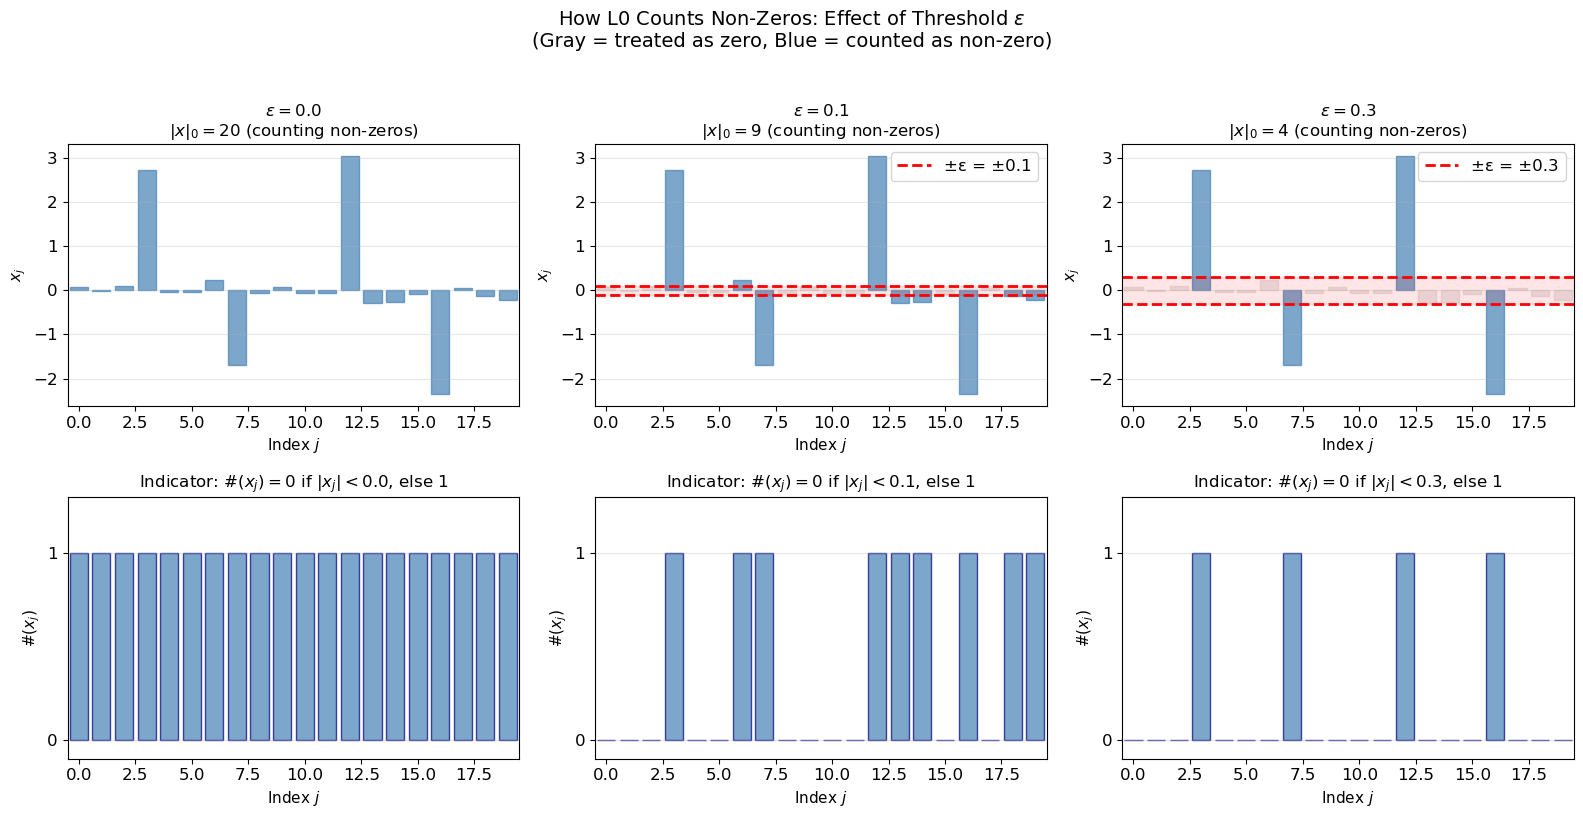


📊 Summary:
  ε = 0.0: ||x||₀ = 20
  ε = 0.1: ||x||₀ = 9
  ε = 0.3: ||x||₀ = 4
Note: Larger ε is more robust to noise but may miss true non-zeros!


In [4]:
# Demonstrate L0 counting on a signal vector with different epsilon thresholds

np.random.seed(42)

# Create a sparse signal with some small noise
n = 20
x_sparse = np.zeros(n)
x_sparse[3] = 2.5
x_sparse[7] = -1.8
x_sparse[12] = 3.0
x_sparse[16] = -2.2

# Add small noise to simulate numerical errors
x_noisy = x_sparse + 0.15 * np.random.randn(n)

fig, axes = plt.subplots(2, 3, figsize=(16, 8))

epsilons_demo = [0.0, 0.1, 0.3]

for col, eps in enumerate(epsilons_demo):
    # Top: the signal with threshold visualization
    ax = axes[0, col]
    bars = ax.bar(range(n), x_noisy, color='steelblue', alpha=0.7, edgecolor='navy')
    
    # Color bars based on whether they're counted as non-zero
    for i, bar in enumerate(bars):
        if np.abs(x_noisy[i]) < eps:
            bar.set_color('lightgray')
            bar.set_alpha(0.5)
        else:
            bar.set_color('steelblue')
    
    # Draw threshold lines
    if eps > 0:
        ax.axhline(eps, color='red', linestyle='--', linewidth=2, label=f'±ε = ±{eps}')
        ax.axhline(-eps, color='red', linestyle='--', linewidth=2)
        ax.fill_between(range(-1, n+1), -eps, eps, alpha=0.1, color='red')
    
    l0_count = np.sum(np.abs(x_noisy) >= eps if eps > 0 else x_noisy != 0)
    ax.set_xlabel('Index $j$', fontsize=11)
    ax.set_ylabel('$x_j$', fontsize=11)
    ax.set_title(f'$\\epsilon = {eps}$\n$\\|x\\|_0 = {l0_count}$ (counting non-zeros)', fontsize=12)
    ax.set_xlim(-0.5, n-0.5)
    ax.grid(True, alpha=0.3, axis='y')
    if eps > 0:
        ax.legend(loc='upper right')
    
    # Bottom: the indicator values
    ax = axes[1, col]
    indicators = indicator_l0(x_noisy, eps)
    colors_ind = ['steelblue' if ind == 1 else 'lightgray' for ind in indicators]
    ax.bar(range(n), indicators, color=colors_ind, edgecolor='navy', alpha=0.7)
    ax.set_xlabel('Index $j$', fontsize=11)
    ax.set_ylabel(r'$\#(x_j)$', fontsize=11)
    ax.set_title(f'Indicator: $\\#(x_j) = 0$ if $|x_j| < {eps}$, else $1$', fontsize=12)
    ax.set_xlim(-0.5, n-0.5)
    ax.set_ylim(-0.1, 1.3)
    ax.set_yticks([0, 1])
    ax.grid(True, alpha=0.3, axis='y')

plt.suptitle('How L0 Counts Non-Zeros: Effect of Threshold $\\epsilon$\n' + 
             '(Gray = treated as zero, Blue = counted as non-zero)', 
             fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

print("\n📊 Summary:")
print("="*60)
for eps in epsilons_demo:
    l0_count = np.sum(np.abs(x_noisy) >= eps if eps > 0 else x_noisy != 0)
    print(f"  ε = {eps:.1f}: ||x||₀ = {l0_count}")
print("="*60)
print("Note: Larger ε is more robust to noise but may miss true non-zeros!")

## 2. L0 Ball vs L1 Ball in 2D

The unit "balls" reveal the geometry:
- **L0 ball**: Union of coordinate axes (non-convex)
- **L1 ball**: Diamond (convex, has corners on axes promoting sparsity)
- **L2 ball**: Circle (convex, isotropic)

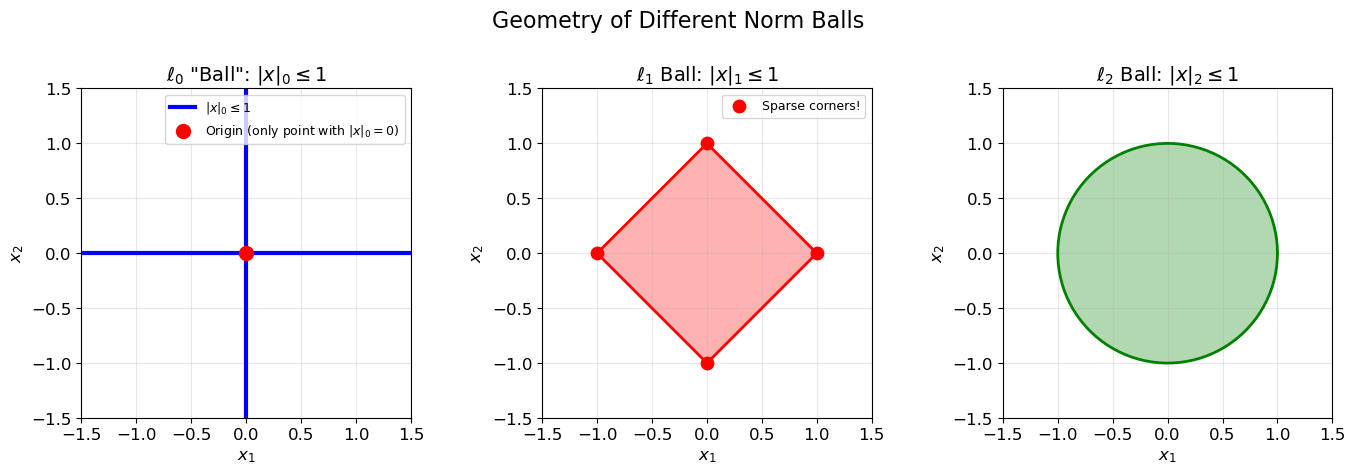

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4.5))

# L0 "ball" - just the axes
ax = axes[0]
ax.axhline(y=0, color='blue', linewidth=3, label=r'$\|x\|_0 \leq 1$')
ax.axvline(x=0, color='blue', linewidth=3)
ax.scatter([0], [0], color='red', s=100, zorder=5, label='Origin (only point with $\|x\|_0=0$)')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_title(r'$\ell_0$ "Ball": $\|x\|_0 \leq 1$', fontsize=14)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right', fontsize=9)

# L1 ball - diamond
ax = axes[1]
theta = np.linspace(0, 2*np.pi, 100)
# L1 unit ball vertices
l1_x = [1, 0, -1, 0, 1]
l1_y = [0, 1, 0, -1, 0]
ax.fill(l1_x, l1_y, alpha=0.3, color='red')
ax.plot(l1_x, l1_y, 'r-', linewidth=2)
ax.scatter([1, -1, 0, 0], [0, 0, 1, -1], color='red', s=80, zorder=5, label='Sparse corners!')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_title(r'$\ell_1$ Ball: $\|x\|_1 \leq 1$', fontsize=14)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right', fontsize=9)

# L2 ball - circle
ax = axes[2]
theta = np.linspace(0, 2*np.pi, 100)
ax.fill(np.cos(theta), np.sin(theta), alpha=0.3, color='green')
ax.plot(np.cos(theta), np.sin(theta), 'g-', linewidth=2)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_title(r'$\ell_2$ Ball: $\|x\|_2 \leq 1$', fontsize=14)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)

plt.suptitle('Geometry of Different Norm Balls', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## 3. The L0 Optimization Landscape

For a simple 2D case, we visualize $f(x_1, x_2) = \|y - Ax\|_2^2 + \lambda \|x\|_0$

In [6]:
# Define a simple problem: y = Ax + noise
np.random.seed(42)

# Measurement matrix (m=3 measurements, n=2 unknowns)
A = np.array([[1, 0.5],
              [0.5, 1],
              [1, 1]])

# True sparse signal (only first component is non-zero)
x_true = np.array([2, 0])

# Observations
y = A @ x_true + 0.1 * np.random.randn(3)

print("Matrix A:")
print(A)
print(f"\nTrue signal x: {x_true}")
print(f"Observations y: {y}")

Matrix A:
[[1.  0.5]
 [0.5 1. ]
 [1.  1. ]]

True signal x: [2 0]
Observations y: [2.04967142 0.98617357 2.06476885]


In [7]:
def objective_l0(x, A, y, lam):
    """L0 regularized objective function"""
    residual = y - A @ x
    data_fidelity = np.sum(residual**2)
    sparsity_penalty = lam * np.sum(x != 0)
    return data_fidelity + sparsity_penalty

def objective_l1(x, A, y, lam):
    """L1 regularized objective function (LASSO)"""
    residual = y - A @ x
    data_fidelity = np.sum(residual**2)
    sparsity_penalty = lam * np.sum(np.abs(x))
    return data_fidelity + sparsity_penalty

# Create grid for visualization
x1_range = np.linspace(-1, 4, 200)
x2_range = np.linspace(-2, 3, 200)
X1, X2 = np.meshgrid(x1_range, x2_range)

# Compute objectives
lam = 1.0  # Regularization parameter

Z_l0 = np.zeros_like(X1)
Z_l1 = np.zeros_like(X1)

for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        x = np.array([X1[i,j], X2[i,j]])
        Z_l0[i,j] = objective_l0(x, A, y, lam)
        Z_l1[i,j] = objective_l1(x, A, y, lam)

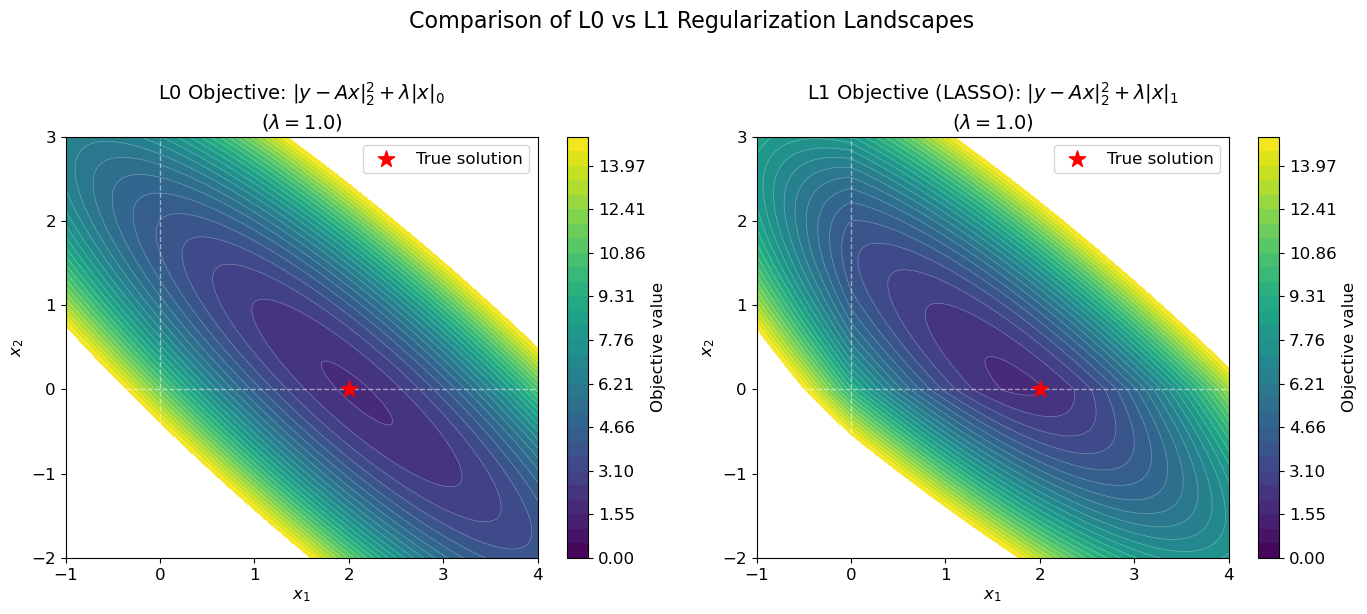

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# L0 objective landscape
ax = axes[0]
levels = np.linspace(0, 15, 30)
cs = ax.contourf(X1, X2, Z_l0, levels=levels, cmap='viridis')
ax.contour(X1, X2, Z_l0, levels=levels, colors='white', alpha=0.3, linewidths=0.5)
ax.scatter([x_true[0]], [x_true[1]], color='red', s=150, marker='*', label='True solution', zorder=5)
ax.axhline(y=0, color='white', linestyle='--', alpha=0.5, linewidth=1)
ax.axvline(x=0, color='white', linestyle='--', alpha=0.5, linewidth=1)
ax.set_xlabel(r'$x_1$', fontsize=12)
ax.set_ylabel(r'$x_2$', fontsize=12)
ax.set_title(r'L0 Objective: $\|y-Ax\|_2^2 + \lambda \|x\|_0$' + f'\n($\lambda = {lam}$)', fontsize=14)
ax.legend(loc='upper right')
plt.colorbar(cs, ax=ax, label='Objective value')

# L1 objective landscape
ax = axes[1]
cs = ax.contourf(X1, X2, Z_l1, levels=levels, cmap='viridis')
ax.contour(X1, X2, Z_l1, levels=levels, colors='white', alpha=0.3, linewidths=0.5)
ax.scatter([x_true[0]], [x_true[1]], color='red', s=150, marker='*', label='True solution', zorder=5)
ax.axhline(y=0, color='white', linestyle='--', alpha=0.5, linewidth=1)
ax.axvline(x=0, color='white', linestyle='--', alpha=0.5, linewidth=1)
ax.set_xlabel(r'$x_1$', fontsize=12)
ax.set_ylabel(r'$x_2$', fontsize=12)
ax.set_title(r'L1 Objective (LASSO): $\|y-Ax\|_2^2 + \lambda \|x\|_1$' + f'\n($\lambda = {lam}$)', fontsize=14)
ax.legend(loc='upper right')
plt.colorbar(cs, ax=ax, label='Objective value')

plt.suptitle('Comparison of L0 vs L1 Regularization Landscapes', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## 4. Discontinuity of L0: The Key Challenge

The L0 penalty creates **discontinuous jumps** at coordinate axes, making the optimization NP-hard.

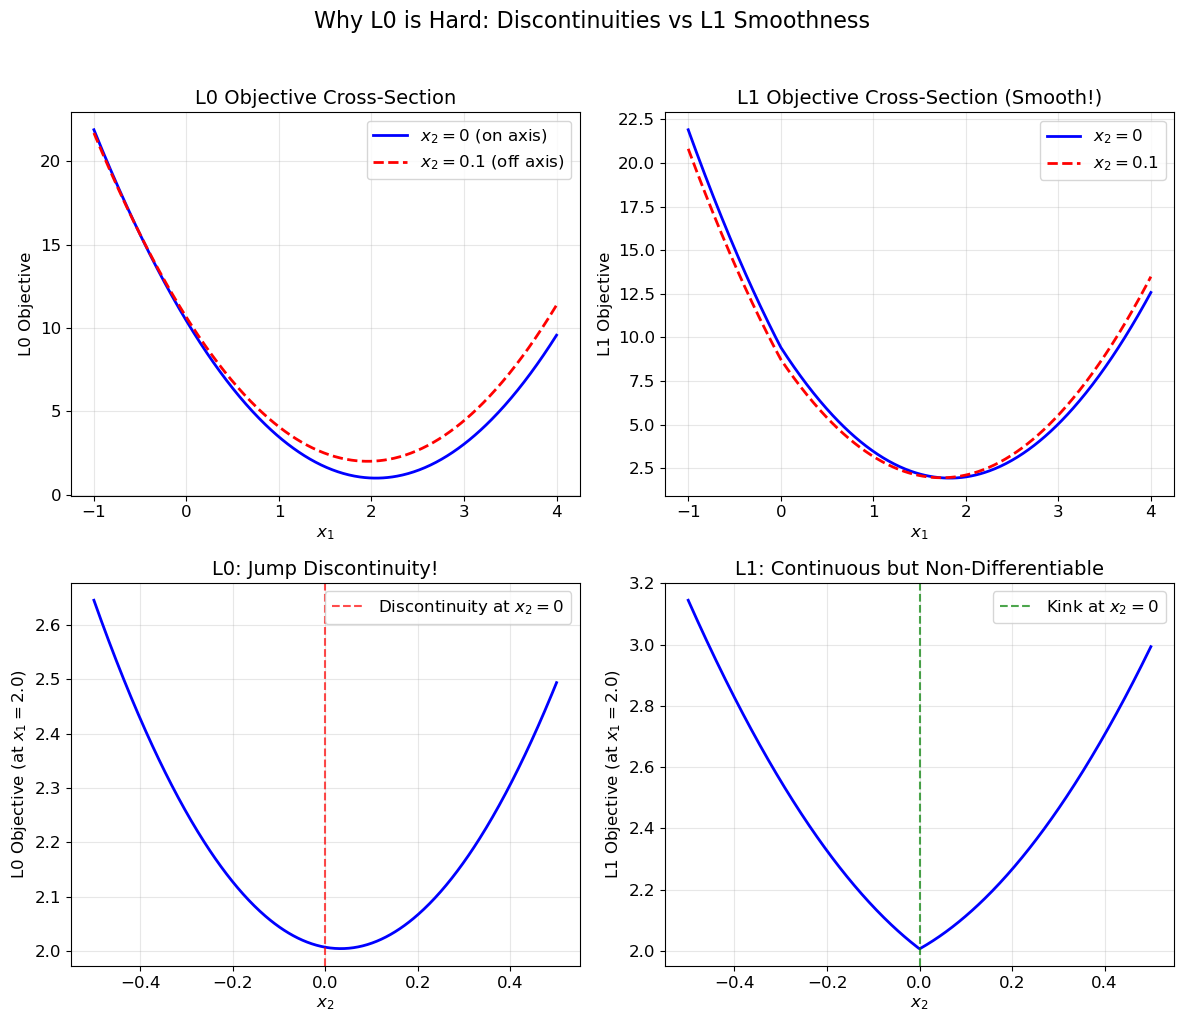

In [9]:
# Show cross-sections to illustrate discontinuity
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Fix x2 = 0 (on the axis)
x1_line = np.linspace(-1, 4, 500)
x2_fixed_0 = 0
x2_fixed_small = 0.1

obj_l0_on_axis = [objective_l0(np.array([x1, x2_fixed_0]), A, y, lam) for x1 in x1_line]
obj_l0_off_axis = [objective_l0(np.array([x1, x2_fixed_small]), A, y, lam) for x1 in x1_line]

ax = axes[0, 0]
ax.plot(x1_line, obj_l0_on_axis, 'b-', linewidth=2, label=f'$x_2 = 0$ (on axis)')
ax.plot(x1_line, obj_l0_off_axis, 'r--', linewidth=2, label=f'$x_2 = {x2_fixed_small}$ (off axis)')
ax.set_xlabel(r'$x_1$', fontsize=12)
ax.set_ylabel('L0 Objective', fontsize=12)
ax.set_title('L0 Objective Cross-Section', fontsize=14)
ax.legend()
ax.grid(True, alpha=0.3)

# Same for L1
obj_l1_on_axis = [objective_l1(np.array([x1, x2_fixed_0]), A, y, lam) for x1 in x1_line]
obj_l1_off_axis = [objective_l1(np.array([x1, x2_fixed_small]), A, y, lam) for x1 in x1_line]

ax = axes[0, 1]
ax.plot(x1_line, obj_l1_on_axis, 'b-', linewidth=2, label=f'$x_2 = 0$')
ax.plot(x1_line, obj_l1_off_axis, 'r--', linewidth=2, label=f'$x_2 = {x2_fixed_small}$')
ax.set_xlabel(r'$x_1$', fontsize=12)
ax.set_ylabel('L1 Objective', fontsize=12)
ax.set_title('L1 Objective Cross-Section (Smooth!)', fontsize=14)
ax.legend()
ax.grid(True, alpha=0.3)

# Show the discontinuity at the axis
x2_range_zoom = np.linspace(-0.5, 0.5, 500)
x1_fixed = 2.0

obj_l0_crossing = [objective_l0(np.array([x1_fixed, x2]), A, y, lam) for x2 in x2_range_zoom]
obj_l1_crossing = [objective_l1(np.array([x1_fixed, x2]), A, y, lam) for x2 in x2_range_zoom]

ax = axes[1, 0]
ax.plot(x2_range_zoom, obj_l0_crossing, 'b-', linewidth=2)
ax.axvline(x=0, color='red', linestyle='--', alpha=0.7, label='Discontinuity at $x_2=0$')
ax.set_xlabel(r'$x_2$', fontsize=12)
ax.set_ylabel(f'L0 Objective (at $x_1={x1_fixed}$)', fontsize=12)
ax.set_title('L0: Jump Discontinuity!', fontsize=14)
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[1, 1]
ax.plot(x2_range_zoom, obj_l1_crossing, 'b-', linewidth=2)
ax.axvline(x=0, color='green', linestyle='--', alpha=0.7, label='Kink at $x_2=0$')
ax.set_xlabel(r'$x_2$', fontsize=12)
ax.set_ylabel(f'L1 Objective (at $x_1={x1_fixed}$)', fontsize=12)
ax.set_title('L1: Continuous but Non-Differentiable', fontsize=14)
ax.legend()
ax.grid(True, alpha=0.3)

plt.suptitle('Why L0 is Hard: Discontinuities vs L1 Smoothness', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## 5. 3D Surface Visualization

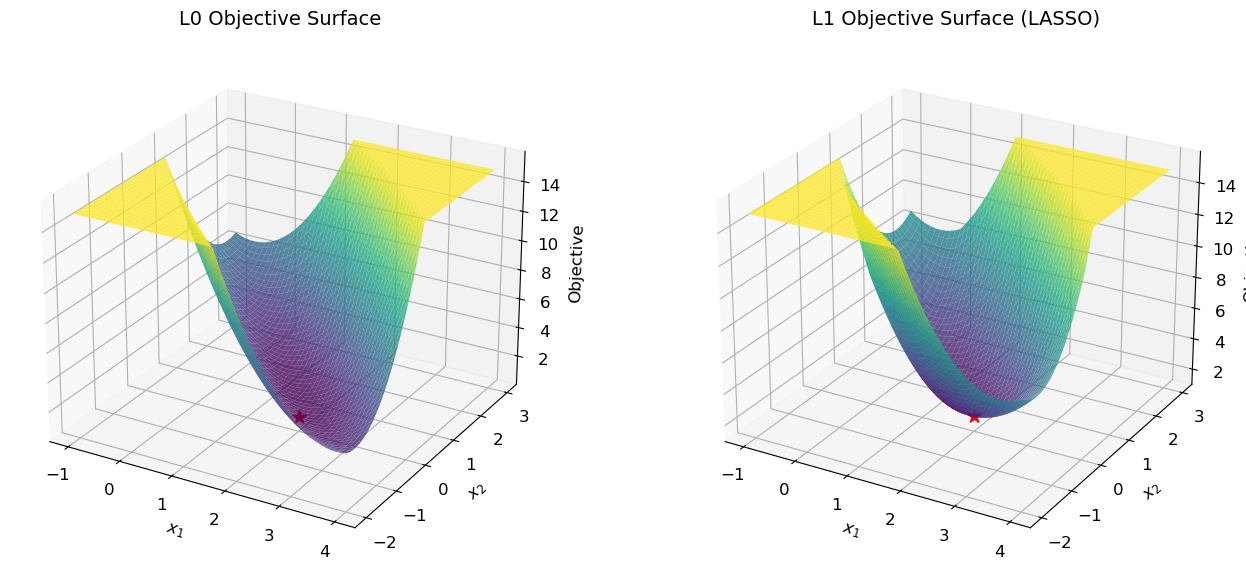

In [10]:
fig = plt.figure(figsize=(14, 6))

# L0 surface
ax1 = fig.add_subplot(121, projection='3d')
Z_l0_clipped = np.clip(Z_l0, 0, 15)
surf1 = ax1.plot_surface(X1, X2, Z_l0_clipped, cmap='viridis', alpha=0.8,
                         linewidth=0, antialiased=True)
ax1.scatter([x_true[0]], [x_true[1]], [objective_l0(x_true, A, y, lam)], 
            color='red', s=100, marker='*', label='True solution')
ax1.set_xlabel(r'$x_1$')
ax1.set_ylabel(r'$x_2$')
ax1.set_zlabel('Objective')
ax1.set_title(r'L0 Objective Surface', fontsize=14)
ax1.view_init(elev=25, azim=-60)

# L1 surface
ax2 = fig.add_subplot(122, projection='3d')
Z_l1_clipped = np.clip(Z_l1, 0, 15)
surf2 = ax2.plot_surface(X1, X2, Z_l1_clipped, cmap='viridis', alpha=0.8,
                         linewidth=0, antialiased=True)
ax2.scatter([x_true[0]], [x_true[1]], [objective_l1(x_true, A, y, lam)], 
            color='red', s=100, marker='*', label='True solution')
ax2.set_xlabel(r'$x_1$')
ax2.set_ylabel(r'$x_2$')
ax2.set_zlabel('Objective')
ax2.set_title(r'L1 Objective Surface (LASSO)', fontsize=14)
ax2.view_init(elev=25, azim=-60)

plt.tight_layout()
plt.show()

## 6. Effect of λ: Sparsity-Accuracy Trade-off

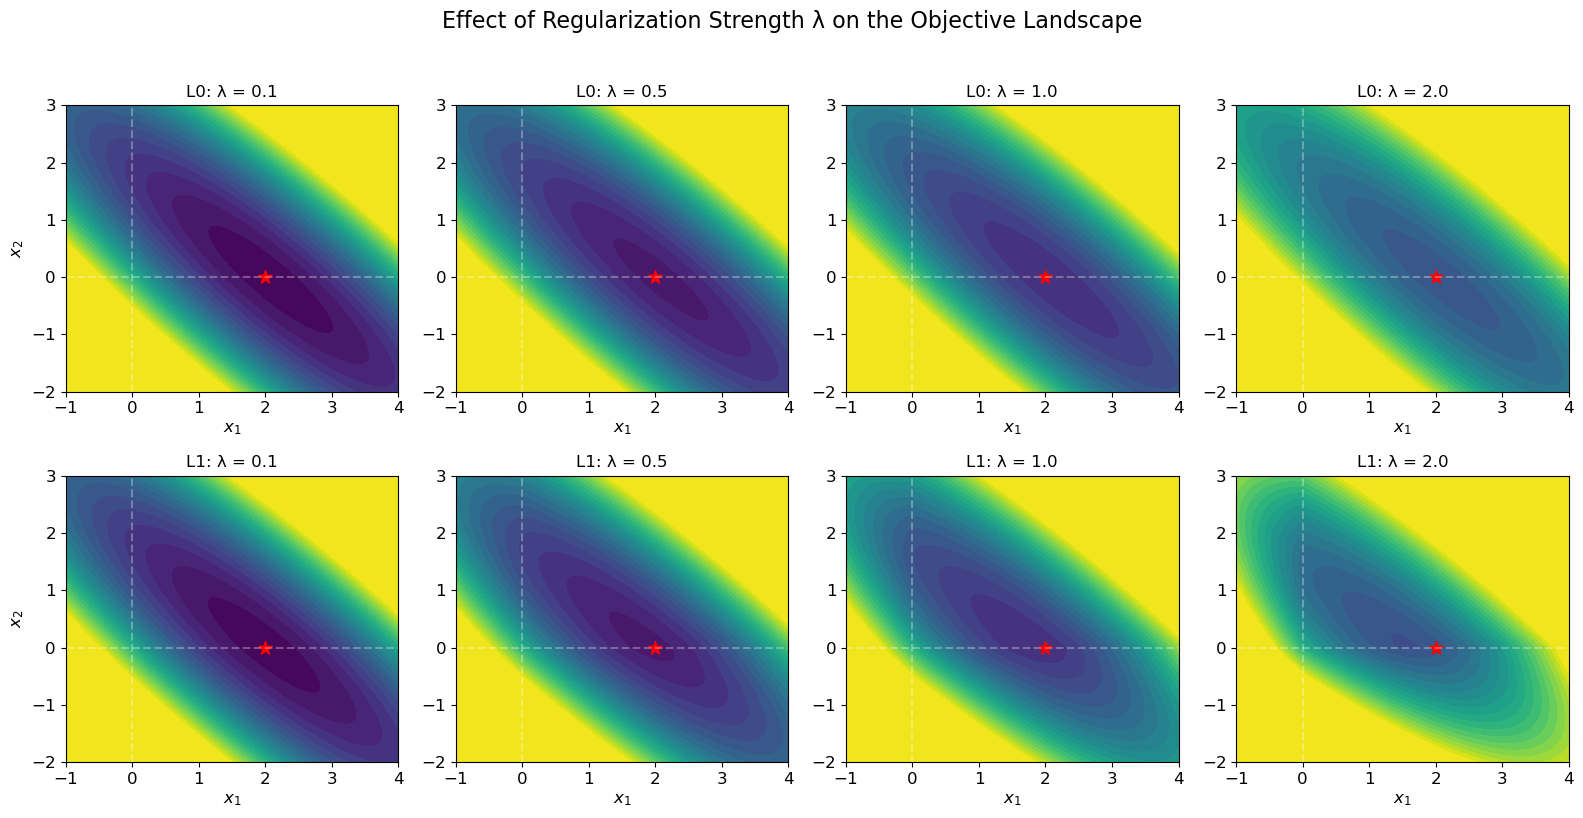

In [11]:
# Show how different λ values affect the landscape
lambdas = [0.1, 0.5, 1.0, 2.0]

fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for idx, lam in enumerate(lambdas):
    # L0
    Z = np.zeros_like(X1)
    for i in range(X1.shape[0]):
        for j in range(X1.shape[1]):
            x = np.array([X1[i,j], X2[i,j]])
            Z[i,j] = objective_l0(x, A, y, lam)
    
    ax = axes[0, idx]
    levels = np.linspace(0, 15, 25)
    cs = ax.contourf(X1, X2, np.clip(Z, 0, 15), levels=levels, cmap='viridis')
    ax.scatter([x_true[0]], [x_true[1]], color='red', s=100, marker='*')
    ax.axhline(y=0, color='white', linestyle='--', alpha=0.3)
    ax.axvline(x=0, color='white', linestyle='--', alpha=0.3)
    ax.set_title(f'L0: λ = {lam}', fontsize=12)
    ax.set_xlabel(r'$x_1$')
    if idx == 0:
        ax.set_ylabel(r'$x_2$')
    
    # L1
    Z = np.zeros_like(X1)
    for i in range(X1.shape[0]):
        for j in range(X1.shape[1]):
            x = np.array([X1[i,j], X2[i,j]])
            Z[i,j] = objective_l1(x, A, y, lam)
    
    ax = axes[1, idx]
    cs = ax.contourf(X1, X2, np.clip(Z, 0, 15), levels=levels, cmap='viridis')
    ax.scatter([x_true[0]], [x_true[1]], color='red', s=100, marker='*')
    ax.axhline(y=0, color='white', linestyle='--', alpha=0.3)
    ax.axvline(x=0, color='white', linestyle='--', alpha=0.3)
    ax.set_title(f'L1: λ = {lam}', fontsize=12)
    ax.set_xlabel(r'$x_1$')
    if idx == 0:
        ax.set_ylabel(r'$x_2$')

plt.suptitle('Effect of Regularization Strength λ on the Objective Landscape', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## 7. Sparse Signal Recovery Example

Demonstrate compressed sensing: recover a sparse signal from few measurements.

In [12]:
from sklearn.linear_model import Lasso, Ridge

# Create a higher-dimensional problem
np.random.seed(123)

n = 50   # Signal dimension
m = 25   # Number of measurements (underdetermined!)
k = 5    # Sparsity (number of non-zeros)

# Random measurement matrix
A = np.random.randn(m, n) / np.sqrt(m)

# True sparse signal
x_true = np.zeros(n)
support = np.random.choice(n, k, replace=False)  # Random support
x_true[support] = np.random.randn(k) * 2

# Noisy observations
noise_level = 0.1
y = A @ x_true + noise_level * np.random.randn(m)

print(f"Problem: Recover {n}-dimensional sparse signal from {m} measurements")
print(f"True sparsity: {k} non-zeros")
print(f"Non-zero positions: {support}")
print(f"Non-zero values: {x_true[support]}")

Problem: Recover 50-dimensional sparse signal from 25 measurements
True sparsity: 5 non-zeros
Non-zero positions: [24 29  0  8 14]
Non-zero values: [ 1.14632275  2.25817078 -1.62952533  0.79002468 -4.95342277]


In [13]:
# Solve using different methods

# 1. Least squares (no regularization) - will fail (underdetermined)
x_ls = np.linalg.lstsq(A, y, rcond=None)[0]

# 2. Ridge regression (L2)
ridge = Ridge(alpha=0.5, fit_intercept=False)
ridge.fit(A, y)
x_ridge = ridge.coef_

# 3. LASSO (L1) - convex relaxation of L0
lasso = Lasso(alpha=0.1, fit_intercept=False, max_iter=10000)
lasso.fit(A, y)
x_lasso = lasso.coef_

print("Recovery Results:")
print(f"  Least Squares: {np.sum(np.abs(x_ls) > 0.1)} non-zeros, MSE = {np.mean((x_true - x_ls)**2):.4f}")
print(f"  Ridge (L2):    {np.sum(np.abs(x_ridge) > 0.1)} non-zeros, MSE = {np.mean((x_true - x_ridge)**2):.4f}")
print(f"  LASSO (L1):    {np.sum(np.abs(x_lasso) > 0.01)} non-zeros, MSE = {np.mean((x_true - x_lasso)**2):.4f}")

Recovery Results:
  Least Squares: 41 non-zeros, MSE = 0.3542
  Ridge (L2):    40 non-zeros, MSE = 0.3818
  LASSO (L1):    1 non-zeros, MSE = 0.2664


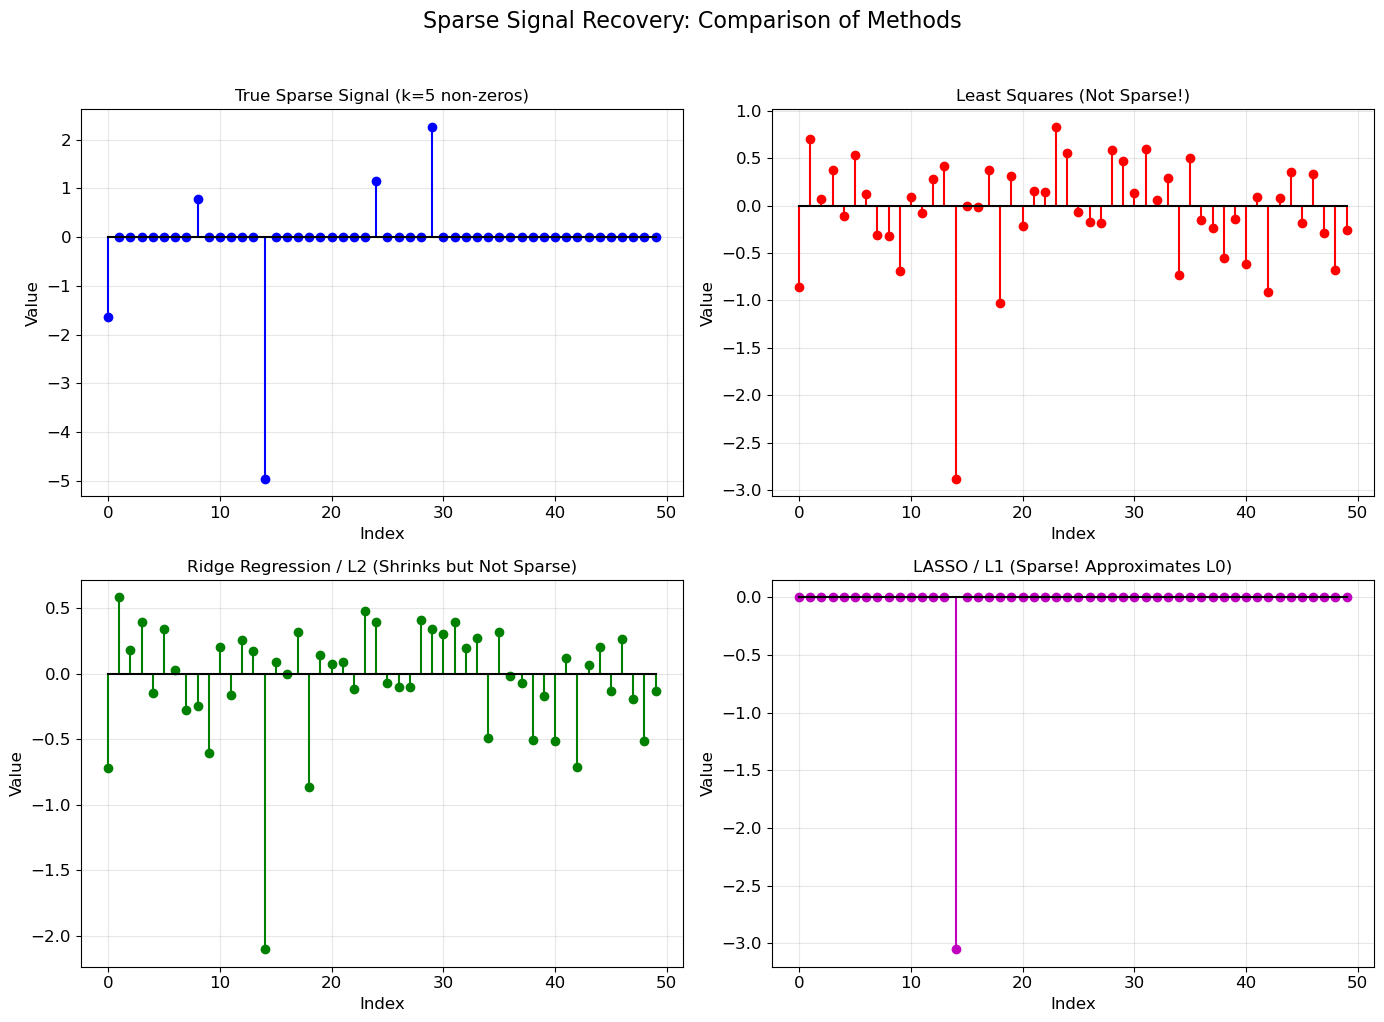

In [14]:
# Visualize the recovery results
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# True signal
ax = axes[0, 0]
ax.stem(range(n), x_true, linefmt='b-', markerfmt='bo', basefmt='k-')
ax.set_title(f'True Sparse Signal (k={k} non-zeros)', fontsize=12)
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.grid(True, alpha=0.3)

# Least squares
ax = axes[0, 1]
ax.stem(range(n), x_ls, linefmt='r-', markerfmt='ro', basefmt='k-')
ax.set_title('Least Squares (Not Sparse!)', fontsize=12)
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.grid(True, alpha=0.3)

# Ridge
ax = axes[1, 0]
ax.stem(range(n), x_ridge, linefmt='g-', markerfmt='go', basefmt='k-')
ax.set_title('Ridge Regression / L2 (Shrinks but Not Sparse)', fontsize=12)
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.grid(True, alpha=0.3)

# LASSO
ax = axes[1, 1]
ax.stem(range(n), x_lasso, linefmt='m-', markerfmt='mo', basefmt='k-')
ax.set_title('LASSO / L1 (Sparse! Approximates L0)', fontsize=12)
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.grid(True, alpha=0.3)

plt.suptitle('Sparse Signal Recovery: Comparison of Methods', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## 8. Iterative Hard Thresholding (IHT) - Solving L0 Directly

**IHT** is a greedy algorithm that directly tackles the L0 problem. It alternates between two steps:

### What is Fixed vs Updated?

| Variable | Description | Fixed or Updated? |
|----------|-------------|-------------------|
| $y \in \mathbb{R}^m$ | Observations (measurements) | **Fixed** |
| $A \in \mathbb{R}^{m \times n}$ | Measurement/sensing matrix | **Fixed** |
| $k$ | Target sparsity level | **Fixed** |
| $\mu$ | Step size | **Fixed** |
| $x^t \in \mathbb{R}^n$ | **Signal estimate at iteration $t$** | **UPDATED each iteration** |

### Algorithm Overview

Given the L0 problem: $\min_x \frac{1}{2}\|y - Ax\|_2^2 + \lambda \|x\|_0$

**Initialize:** $x^0 = 0$ (start with all zeros)

**At each iteration $t = 0, 1, 2, \ldots$:**

1. **Gradient Step** (update $x$ to reduce data fidelity error):
   $$x^{t+\frac{1}{2}} = x^t + \mu A^T(y - Ax^t)$$
   
   - Compute residual: $r = y - Ax^t$ (how well current $x^t$ explains $y$)
   - Compute gradient direction: $A^T r$ (which components of $x$ to adjust)
   - Update: move $x^t$ in the gradient direction
   - Step size: $\mu = 1/\|A\|_2^2$ ensures convergence

2. **Hard Thresholding** (enforce sparsity on $x$):
   $$x^{t+1} = H_k(x^{t+\frac{1}{2}})$$
   
   - Keep only the $k$ largest magnitude entries of $x^{t+\frac{1}{2}}$
   - Set all other entries to zero

### Key Insight: Hard Thresholding Operator

The hard thresholding operator $H_k$ is the **proximal operator** for the L0 constraint:

$$H_k(z) = \arg\min_x \|x - z\|_2^2 \quad \text{s.t.} \quad \|x\|_0 \leq k$$

This has a **closed-form solution**: keep the $k$ entries with largest $|z_j|$, zero out the rest.

### Why It Works

- **Gradient step**: Moves $x$ toward minimizing $\|y - Ax\|_2^2$ (better data fit, but dense)
- **Hard thresholding**: Projects $x$ onto the set of $k$-sparse vectors (sparsity constraint)
- **Together**: Finds a sparse $x$ that explains the observations $y$ well

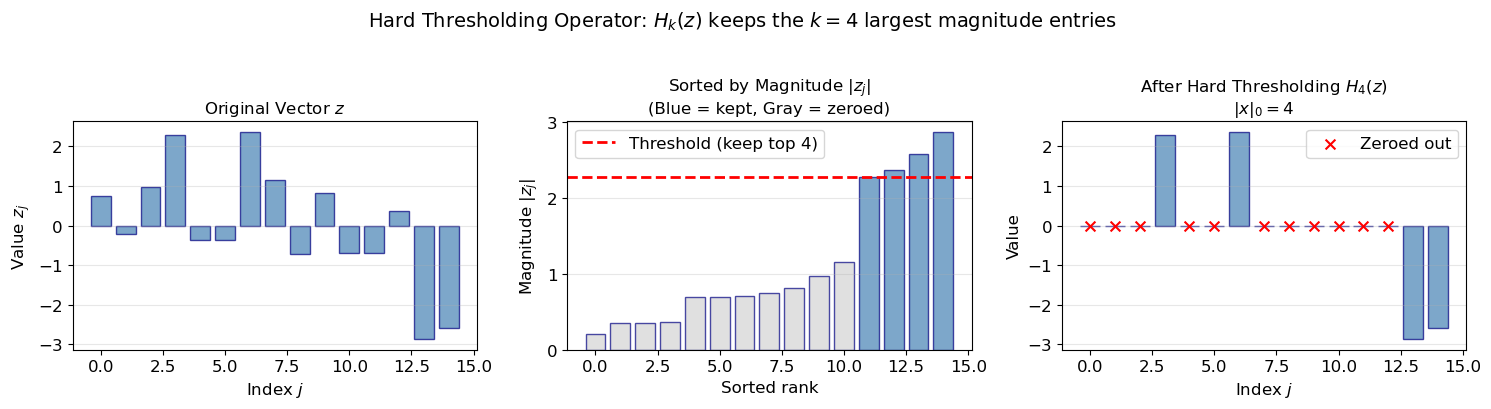


📊 Hard Thresholding Summary:
  Input:  z with 15 entries
  Output: H_k(z) with only k=4 non-zeros
  Kept indices: [3, 6, 13, 14]
  Zeroed indices: [0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 12]


In [15]:
# Visualize the Hard Thresholding Operator H_k

def hard_threshold(x, k):
    """Keep only the k largest magnitude entries"""
    x_thresh = np.zeros_like(x)
    idx = np.argsort(np.abs(x))[-k:]  # Indices of k largest
    x_thresh[idx] = x[idx]
    return x_thresh

def hard_threshold_with_details(x, k):
    """
    Hard thresholding: keep k largest magnitude entries, zero out rest.
    Returns: thresholded vector, indices kept, indices zeroed
    """
    x_thresh = np.zeros_like(x)
    sorted_idx = np.argsort(np.abs(x))  # Sort by magnitude (ascending)
    kept_idx = sorted_idx[-k:]  # Keep k largest
    zeroed_idx = sorted_idx[:-k]  # Zero out the rest
    x_thresh[kept_idx] = x[kept_idx]
    return x_thresh, kept_idx, zeroed_idx

# Create example vector to demonstrate hard thresholding
np.random.seed(42)
z = np.random.randn(15) * 1.5  # Random vector
k = 4  # Keep 4 largest

z_thresh, kept, zeroed = hard_threshold_with_details(z, k)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Original vector
ax = axes[0]
colors = ['steelblue'] * len(z)
ax.bar(range(len(z)), z, color=colors, edgecolor='navy', alpha=0.7)
ax.set_title('Original Vector $z$', fontsize=12)
ax.set_xlabel('Index $j$')
ax.set_ylabel('Value $z_j$')
ax.grid(True, alpha=0.3, axis='y')

# Show sorted magnitudes
ax = axes[1]
sorted_idx = np.argsort(np.abs(z))
sorted_magnitudes = np.abs(z)[sorted_idx]
colors = ['lightgray'] * (len(z) - k) + ['steelblue'] * k
ax.bar(range(len(z)), sorted_magnitudes, color=colors, edgecolor='navy', alpha=0.7)
ax.axhline(y=sorted_magnitudes[len(z)-k], color='red', linestyle='--', linewidth=2,
           label=f'Threshold (keep top {k})')
ax.set_title(f'Sorted by Magnitude $|z_j|$\n(Blue = kept, Gray = zeroed)', fontsize=12)
ax.set_xlabel('Sorted rank')
ax.set_ylabel('Magnitude $|z_j|$')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# After hard thresholding
ax = axes[2]
colors = ['steelblue' if i in kept else 'lightgray' for i in range(len(z))]
ax.bar(range(len(z)), z_thresh, color=colors, edgecolor='navy', alpha=0.7)
ax.scatter(zeroed, [0]*len(zeroed), color='red', s=50, marker='x', zorder=5, label='Zeroed out')
ax.set_title(f'After Hard Thresholding $H_{{{k}}}(z)$\n$\\|x\\|_0 = {k}$', fontsize=12)
ax.set_xlabel('Index $j$')
ax.set_ylabel('Value')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

plt.suptitle(f'Hard Thresholding Operator: $H_k(z)$ keeps the $k={k}$ largest magnitude entries', 
             fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

print("\n📊 Hard Thresholding Summary:")
print(f"  Input:  z with {len(z)} entries")
print(f"  Output: H_k(z) with only k={k} non-zeros")
print(f"  Kept indices: {sorted(kept)}")
print(f"  Zeroed indices: {sorted(zeroed)}")

CHALLENGING IHT PROBLEM (correlated columns + noise)
Problem dimensions: m=20 measurements, n=30 unknowns
True sparsity k=4
True support: [ 3 10 18 25]
Noise level: 0.3


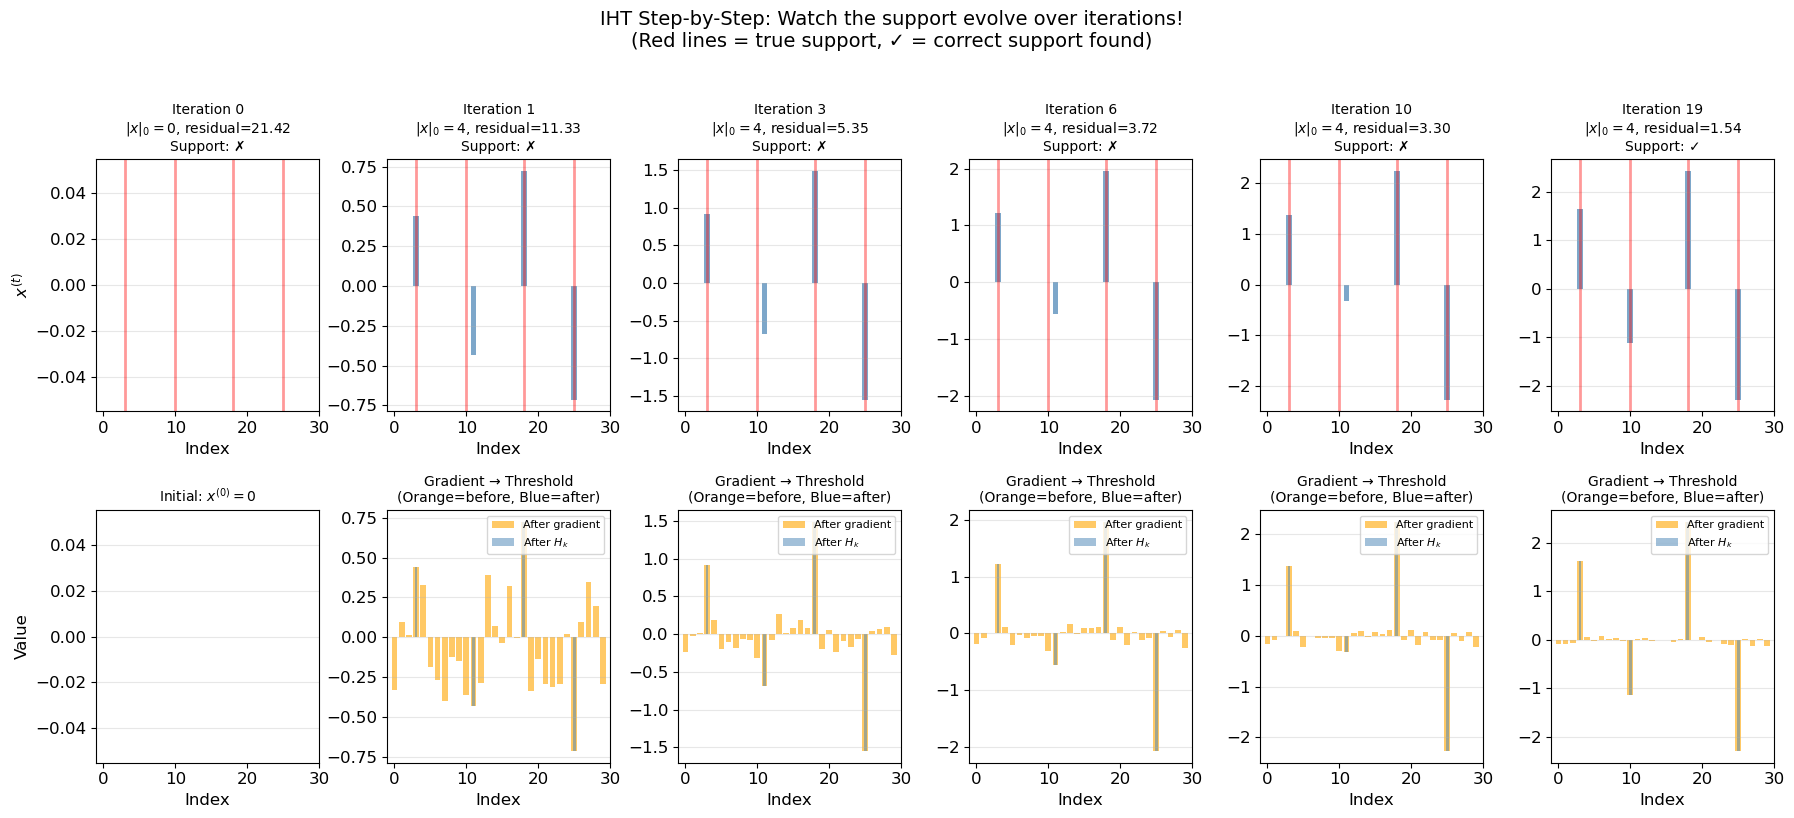

In [16]:
# Step-by-step visualization of IHT iterations
# Create a MORE CHALLENGING problem where IHT needs iterations to converge

def IHT_detailed(A, y, k, max_iter=10, step_size=None):
    """
    Iterative Hard Thresholding with detailed tracking.
    
    At each iteration:
    1. Gradient step: x_half = x + μ * A^T(y - Ax)  [move toward data fit]
    2. Hard threshold: x_new = H_k(x_half)          [enforce sparsity]
    """
    m, n = A.shape
    x = np.zeros(n)
    
    if step_size is None:
        step_size = 1.0 / np.linalg.norm(A, 2)**2
    
    # Track history
    history = {
        'x': [x.copy()],
        'x_half': [],  # After gradient step
        'residual': [np.sum((y - A @ x)**2)],
        'support': [set()]
    }
    
    for i in range(max_iter):
        # Step 1: Gradient descent step (reduce ||y - Ax||²)
        residual = y - A @ x
        gradient = A.T @ residual  # = A^T(y - Ax)
        x_half = x + step_size * gradient  # Move toward better data fit
        
        # Step 2: Hard threshold to enforce sparsity
        x_new = hard_threshold(x_half, k)
        
        # Record
        history['x_half'].append(x_half.copy())
        history['x'].append(x_new.copy())
        history['residual'].append(np.sum((y - A @ x_new)**2))
        history['support'].append(set(np.where(np.abs(x_new) > 1e-10)[0]))
        
        x = x_new
    
    return x, history

# ============================================================
# CREATE A MORE CHALLENGING PROBLEM for IHT demonstration
# ============================================================
# Problem: Correlated columns make it harder to identify the correct support
np.random.seed(2026)

n_iht = 30   # Signal dimension
m_iht = 20   # Number of measurements
k_iht = 4    # Sparsity

# Create measurement matrix with some correlated columns (higher coherence)
A_base = np.random.randn(m_iht, n_iht) / np.sqrt(m_iht)
# Add correlation: make some columns similar to others
A_iht = A_base.copy()
A_iht[:, 5] = 0.7 * A_iht[:, 10] + 0.3 * np.random.randn(m_iht) / np.sqrt(m_iht)
A_iht[:, 15] = 0.6 * A_iht[:, 20] + 0.4 * np.random.randn(m_iht) / np.sqrt(m_iht)

# True sparse signal - choose support that includes correlated columns
support_iht = np.array([3, 10, 18, 25])  # Fixed support for reproducibility
x_true_iht = np.zeros(n_iht)
x_true_iht[support_iht] = np.array([2.0, -1.5, 1.8, -2.2])

# Higher noise to make it more challenging
noise_level_iht = 0.3
y_iht = A_iht @ x_true_iht + noise_level_iht * np.random.randn(m_iht)

print("=" * 60)
print("CHALLENGING IHT PROBLEM (correlated columns + noise)")
print("=" * 60)
print(f"Problem dimensions: m={m_iht} measurements, n={n_iht} unknowns")
print(f"True sparsity k={k_iht}")
print(f"True support: {support_iht}")
print(f"Noise level: {noise_level_iht}")
print("=" * 60)

# Run IHT on this challenging problem
x_iht_detailed, iht_history = IHT_detailed(A_iht, y_iht, k=k_iht, max_iter=20)

# Visualize iterations
iterations_to_show = [0, 1, 3, 6, 10, 19]
fig, axes = plt.subplots(2, len(iterations_to_show), figsize=(18, 8))

for col, it in enumerate(iterations_to_show):
    # Top row: show x at this iteration
    ax = axes[0, col]
    x_it = iht_history['x'][it]
    colors = ['steelblue' if np.abs(v) > 1e-10 else 'lightgray' for v in x_it]
    ax.bar(range(n_iht), x_it, color=colors, alpha=0.7, width=0.8)
    
    # Mark true support
    for idx in support_iht:
        ax.axvline(idx, color='red', alpha=0.4, linewidth=2)
    
    nnz = np.sum(np.abs(x_it) > 1e-10)
    res = iht_history['residual'][it]
    
    # Check support match
    current_support = set(np.where(np.abs(x_it) > 1e-10)[0])
    true_support_set = set(support_iht)
    match = "✓" if current_support == true_support_set else "✗"
    
    ax.set_title(f'Iteration {it}\n$\\|x\\|_0={nnz}$, residual={res:.2f}\nSupport: {match}', fontsize=10)
    ax.set_xlabel('Index')
    if col == 0:
        ax.set_ylabel('$x^{(t)}$')
    ax.set_xlim(-1, n_iht)
    ax.grid(True, alpha=0.3, axis='y')
    
    # Bottom row: show x_half (before thresholding) for iterations > 0
    ax = axes[1, col]
    if it > 0:
        x_half = iht_history['x_half'][it-1]
        ax.bar(range(n_iht), x_half, color='orange', alpha=0.6, width=0.8, label='After gradient')
        ax.bar(range(n_iht), iht_history['x'][it], color='steelblue', alpha=0.5, width=0.4, label='After $H_k$')
        ax.set_title(f'Gradient → Threshold\n(Orange=before, Blue=after)', fontsize=10)
        ax.legend(fontsize=8, loc='upper right')
    else:
        ax.bar(range(n_iht), np.zeros(n_iht), color='gray', alpha=0.3)
        ax.set_title('Initial: $x^{(0)} = 0$', fontsize=10)
    ax.set_xlabel('Index')
    if col == 0:
        ax.set_ylabel('Value')
    ax.set_xlim(-1, n_iht)
    ax.grid(True, alpha=0.3, axis='y')

plt.suptitle('IHT Step-by-Step: Watch the support evolve over iterations!\n' + 
             '(Red lines = true support, ✓ = correct support found)', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

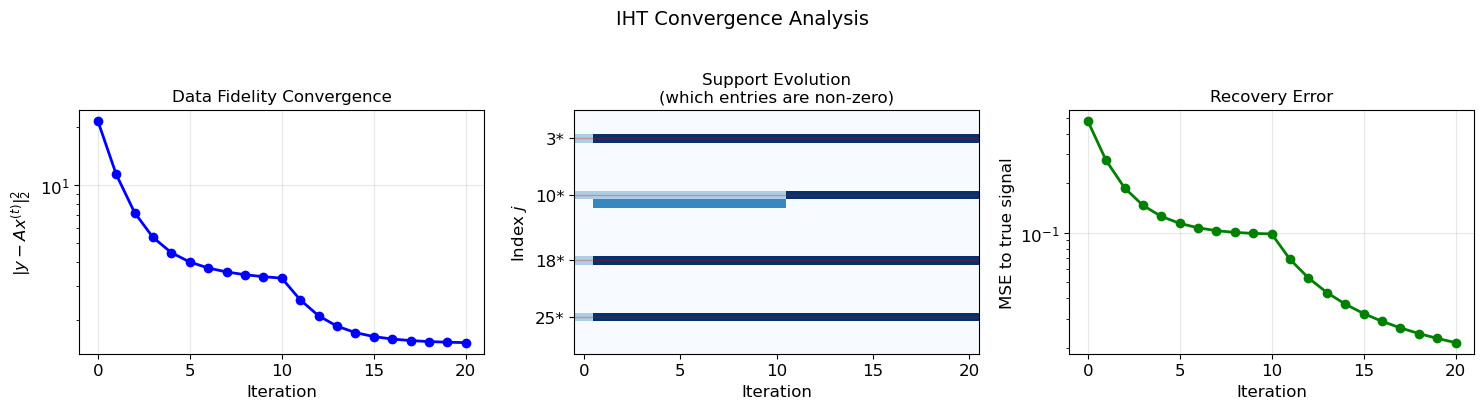


IHT ITERATION SUMMARY
 Iter |     Residual |        MSE | Support (active indices)      
----------------------------------------------------------------------
    0 |      21.4151 |     0.4777 | ∅ (empty)                     
    1 |      11.3311 |     0.2744 | [3, 11, 18, 25]               
    3 |       5.3510 |     0.1464 | [3, 11, 18, 25]               
    6 |       3.7202 |     0.1070 | [3, 11, 18, 25]               
   10 |       3.2964 |     0.0983 | [3, 11, 18, 25]               
   20 |       1.5311 |     0.0215 | [3, 10, 18, 25]               
----------------------------------------------------------------------
True support: [3, 10, 18, 25]


In [17]:
# Visualize IHT convergence and support evolution

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 1. Residual convergence
ax = axes[0]
ax.semilogy(iht_history['residual'], 'b-o', linewidth=2, markersize=6)
ax.set_xlabel('Iteration', fontsize=12)
ax.set_ylabel('$\\|y - Ax^{(t)}\\|_2^2$', fontsize=12)
ax.set_title('Data Fidelity Convergence', fontsize=12)
ax.grid(True, alpha=0.3)

# 2. Support evolution (which indices are active)
ax = axes[1]
n_iters = len(iht_history['support'])
support_matrix = np.zeros((n_iht, n_iters))
for t, supp in enumerate(iht_history['support']):
    for idx in supp:
        support_matrix[idx, t] = 1

# Mark true support
for idx in support_iht:
    support_matrix[idx, :] += 0.5  # Make true support brighter

ax.imshow(support_matrix, aspect='auto', cmap='Blues', interpolation='nearest')
ax.set_xlabel('Iteration', fontsize=12)
ax.set_ylabel('Index $j$', fontsize=12)
ax.set_title('Support Evolution\n(which entries are non-zero)', fontsize=12)

# Highlight true support on y-axis
for idx in support_iht:
    ax.axhline(idx, color='red', alpha=0.3, linewidth=1)

ax.set_yticks(support_iht)
ax.set_yticklabels([f'{i}*' for i in support_iht])

# 3. MSE to true signal
ax = axes[2]
mses = [np.mean((x_true_iht - iht_history['x'][t])**2) for t in range(len(iht_history['x']))]
ax.semilogy(mses, 'g-o', linewidth=2, markersize=6)
ax.set_xlabel('Iteration', fontsize=12)
ax.set_ylabel('MSE to true signal', fontsize=12)
ax.set_title('Recovery Error', fontsize=12)
ax.grid(True, alpha=0.3)

plt.suptitle('IHT Convergence Analysis', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# Summary table
print("\n" + "="*70)
print("IHT ITERATION SUMMARY")
print("="*70)
print(f"{'Iter':>5} | {'Residual':>12} | {'MSE':>10} | {'Support (active indices)':<30}")
print("-"*70)
for t in [0, 1, 3, 6, 10, len(iht_history['x'])-1]:
    res = iht_history['residual'][t]
    mse = np.mean((x_true_iht - iht_history['x'][t])**2)
    supp = sorted(iht_history['support'][t])
    supp_str = str(supp) if supp else '∅ (empty)'
    print(f"{t:>5} | {res:>12.4f} | {mse:>10.4f} | {supp_str:<30}")
print("-"*70)
print(f"True support: {sorted(support_iht)}")
print("="*70)

## 9. Forward Greedy Selection (Stepwise Pursuit)

**Alternative approach:** Instead of gradient + threshold, use a greedy forward selection:

1. Solve for all coefficients (least squares on full problem)
2. Pick the $k$ largest magnitude coefficients → add to support
3. Re-solve least squares on current support
4. Look at residual, solve for remaining coefficients
5. Pick next $k$ largest → add to support
6. Repeat until desired sparsity reached

This is similar to **Orthogonal Matching Pursuit (OMP)** but adds multiple indices at once.

In [18]:
# Forward Greedy Selection - pick k best at a time

def forward_greedy_selection(A, y, k_per_step=3, total_k=9, verbose=True):
    """
    Forward greedy selection:
    1. Solve least squares for all coefficients
    2. Pick top k_per_step largest → add to support
    3. Re-solve on support, compute residual
    4. Solve for remaining coefficients on residual
    5. Pick next k_per_step largest → add to support
    6. Repeat
    
    Returns history of selections at each stage.
    """
    m, n = A.shape
    support = set()  # Active indices
    history = {
        'support': [set()],
        'x': [np.zeros(n)],
        'residual_norm': [np.linalg.norm(y)**2],
        'correlations': [],  # |A^T * residual| at each step
        'selected_this_step': []
    }
    
    residual = y.copy()
    x_current = np.zeros(n)
    
    n_steps = (total_k + k_per_step - 1) // k_per_step
    
    for step in range(n_steps):
        if verbose:
            print(f"\n{'='*60}")
            print(f"STEP {step + 1}: Current support size = {len(support)}")
            print(f"{'='*60}")
        
        # Step 1: Compute correlations of residual with all columns
        # |A^T * residual| tells us which columns best explain remaining signal
        correlations = np.abs(A.T @ residual)
        
        # Zero out already selected indices
        for idx in support:
            correlations[idx] = -np.inf
        
        history['correlations'].append(correlations.copy())
        
        # Step 2: Pick top k_per_step indices with largest correlation
        remaining_to_select = min(k_per_step, total_k - len(support))
        if remaining_to_select <= 0:
            break
            
        new_indices = np.argsort(correlations)[-remaining_to_select:]
        new_indices = set(new_indices.tolist())
        
        if verbose:
            print(f"Correlations |A^T * r|: top candidates = {sorted(new_indices)}")
            print(f"  (correlation values: {[correlations[i] for i in sorted(new_indices)]})")
        
        # Step 3: Add to support
        support = support.union(new_indices)
        history['selected_this_step'].append(new_indices)
        
        if verbose:
            print(f"Added indices: {sorted(new_indices)}")
            print(f"New support: {sorted(support)}")
        
        # Step 4: Re-solve least squares on current support
        support_list = sorted(list(support))
        A_support = A[:, support_list]
        
        # Solve min ||y - A_S * x_S||^2
        x_support, _, _, _ = np.linalg.lstsq(A_support, y, rcond=None)
        
        # Update full x vector
        x_current = np.zeros(n)
        for i, idx in enumerate(support_list):
            x_current[idx] = x_support[i]
        
        # Step 5: Update residual
        residual = y - A @ x_current
        residual_norm = np.linalg.norm(residual)**2
        
        if verbose:
            print(f"Residual ||y - Ax||² = {residual_norm:.4f}")
        
        # Record history
        history['support'].append(support.copy())
        history['x'].append(x_current.copy())
        history['residual_norm'].append(residual_norm)
    
    return x_current, history

# Create a 1D-style problem (tall matrix, sparse solution)
np.random.seed(42)

n_fwd = 30   # Number of unknowns
m_fwd = 20   # Number of measurements
k_true = 9   # True sparsity (3 groups of 3)

# Random measurement matrix
A_fwd = np.random.randn(m_fwd, n_fwd) / np.sqrt(m_fwd)

# True sparse signal with k_true non-zeros
x_true_fwd = np.zeros(n_fwd)
true_support_fwd = np.array([2, 7, 11, 15, 19, 22, 25, 27, 29])  # 9 non-zeros
x_true_fwd[true_support_fwd] = np.array([2.5, -1.8, 2.0, -2.2, 1.5, -1.9, 2.1, -1.7, 2.3])

# Observations with small noise
noise_fwd = 0.1
y_fwd = A_fwd @ x_true_fwd + noise_fwd * np.random.randn(m_fwd)

print("="*60)
print("FORWARD GREEDY SELECTION DEMO")
print("="*60)
print(f"Problem: {m_fwd} measurements, {n_fwd} unknowns")
print(f"True support (k={k_true}): {sorted(true_support_fwd)}")
print(f"Selecting k={3} indices per step")

# Run forward greedy selection: pick 3 at a time
x_greedy, greedy_history = forward_greedy_selection(
    A_fwd, y_fwd, k_per_step=3, total_k=9, verbose=True
)

FORWARD GREEDY SELECTION DEMO
Problem: 20 measurements, 30 unknowns
True support (k=9): [2, 7, 11, 15, 19, 22, 25, 27, 29]
Selecting k=3 indices per step

STEP 1: Current support size = 0
Correlations |A^T * r|: top candidates = [2, 7, 22]
  (correlation values: [2.0625595429924313, 3.1573911818711142, 3.957523265566629])
Added indices: [2, 7, 22]
New support: [2, 7, 22]
Residual ||y - Ax||² = 7.8119

STEP 2: Current support size = 3
Correlations |A^T * r|: top candidates = [6, 17, 29]
  (correlation values: [1.2249308216985055, 1.27361313824129, 2.189538682436474])
Added indices: [6, 17, 29]
New support: [2, 6, 7, 17, 22, 29]
Residual ||y - Ax||² = 3.2336

STEP 3: Current support size = 6
Correlations |A^T * r|: top candidates = [4, 10, 27]
  (correlation values: [0.571903196602952, 0.9122277182010836, 0.7253475428985888])
Added indices: [4, 10, 27]
New support: [2, 4, 6, 7, 10, 17, 22, 27, 29]
Residual ||y - Ax||² = 1.6370


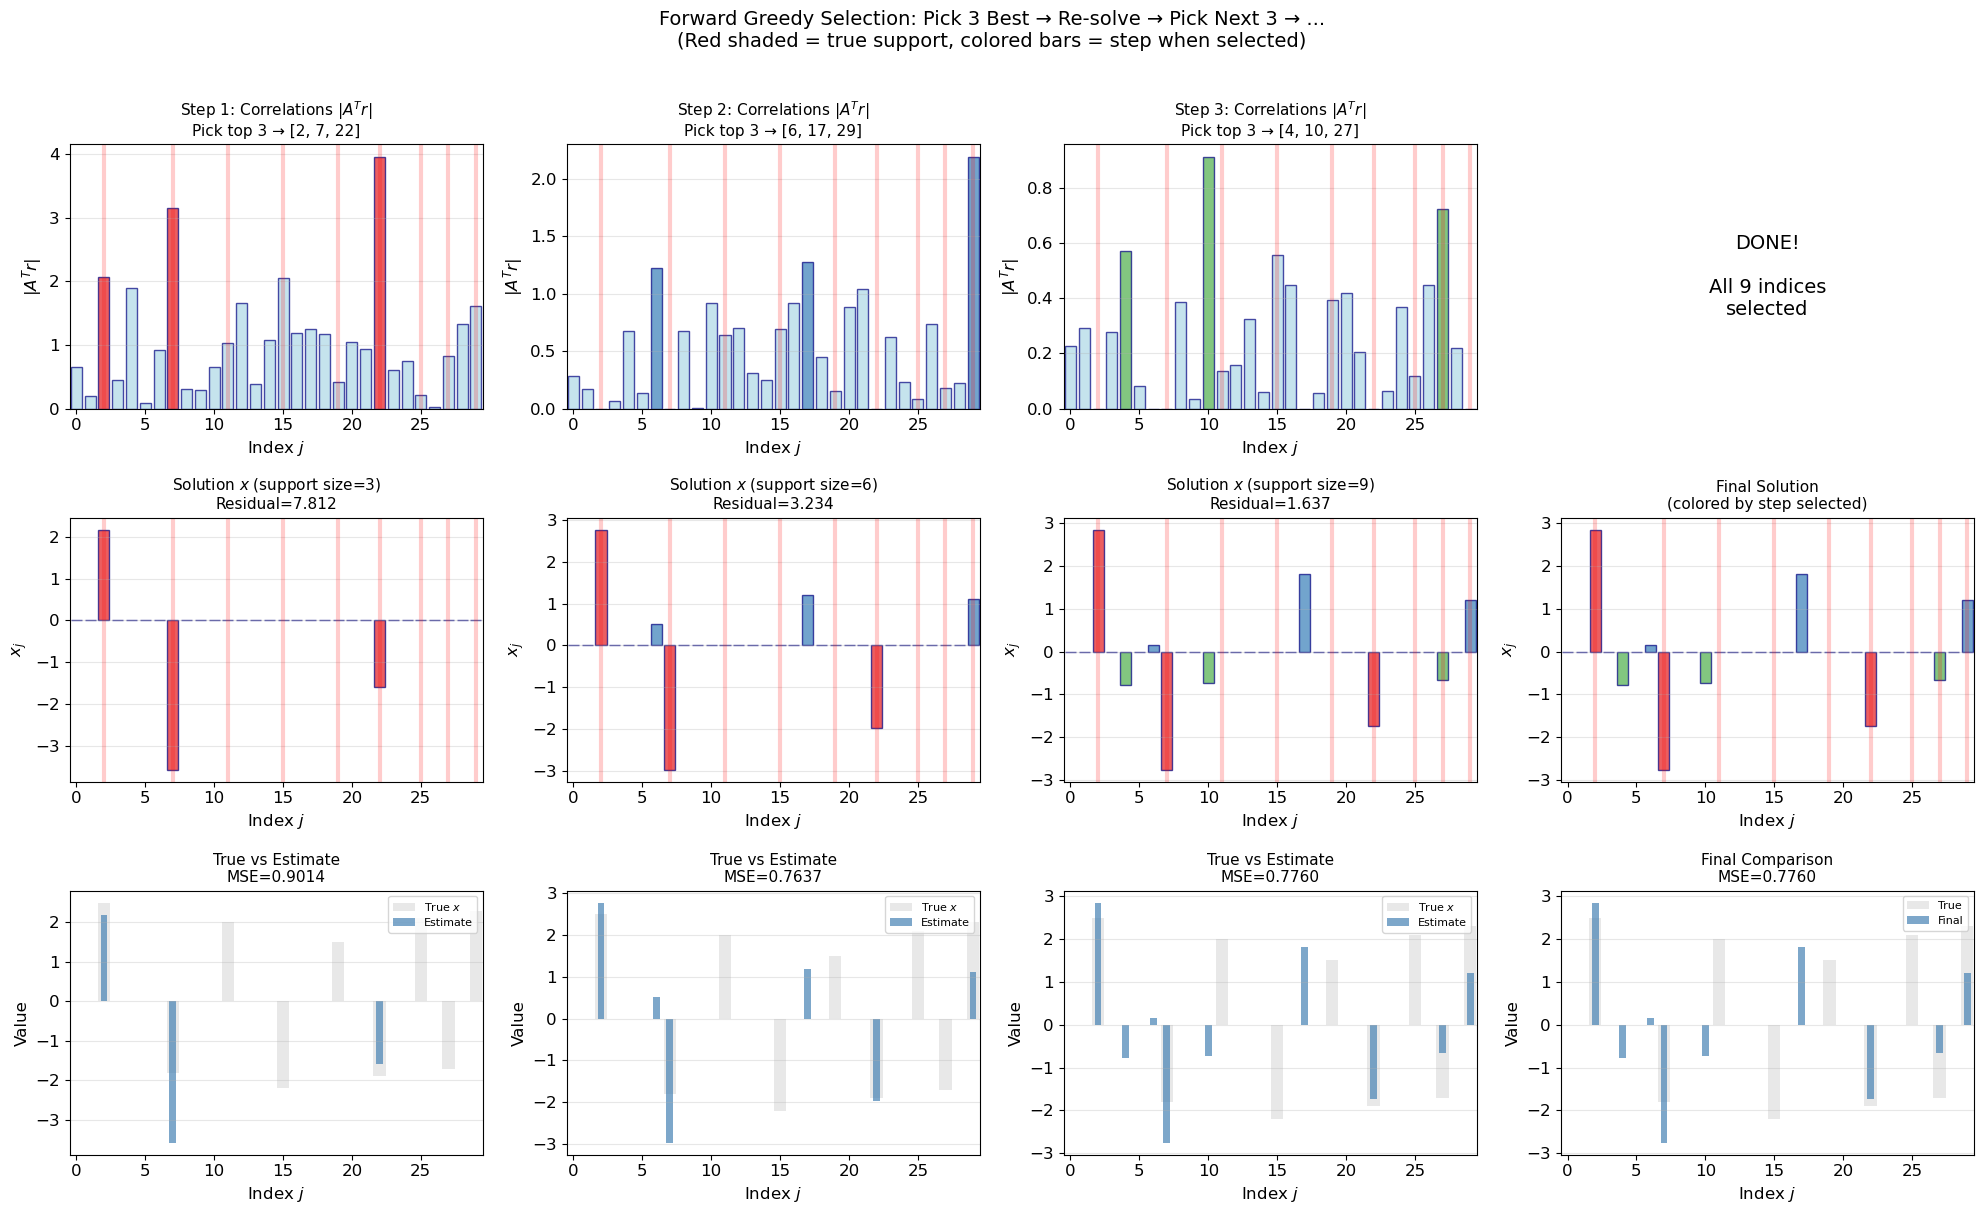


FORWARD GREEDY SELECTION SUMMARY
True support:  [2, 7, 11, 15, 19, 22, 25, 27, 29]
Found support: [2, 4, 6, 7, 10, 17, 22, 27, 29]
Correct: False

Step-by-step selections:
  Step 1: [2, 7, 22] → residual = 7.8119
  Step 2: [6, 17, 29] → residual = 3.2336
  Step 3: [4, 10, 27] → residual = 1.6370


In [19]:
# Visualize Forward Greedy Selection step by step

n_steps_vis = len(greedy_history['correlations'])
fig, axes = plt.subplots(3, n_steps_vis + 1, figsize=(5*(n_steps_vis + 1), 12))

# Colors for each step's selection
step_colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3']  # Red, Blue, Green, Purple

for step in range(n_steps_vis):
    # === Row 0: Show correlations |A^T * r| and which ones we pick ===
    ax = axes[0, step]
    corr = greedy_history['correlations'][step]
    corr_plot = np.where(corr == -np.inf, 0, corr)  # Replace -inf with 0 for plotting
    
    # Color bars: selected this step = color, already selected = gray, not selected = light
    colors = []
    selected_this_step = greedy_history['selected_this_step'][step]
    already_selected = greedy_history['support'][step]
    
    for i in range(n_fwd):
        if i in selected_this_step:
            colors.append(step_colors[step])
        elif i in already_selected:
            colors.append('gray')
        else:
            colors.append('lightblue')
    
    ax.bar(range(n_fwd), corr_plot, color=colors, edgecolor='navy', alpha=0.7)
    
    # Mark true support
    for idx in true_support_fwd:
        ax.axvline(idx, color='red', alpha=0.2, linewidth=3)
    
    ax.set_title(f'Step {step+1}: Correlations $|A^T r|$\nPick top 3 → {sorted(selected_this_step)}', 
                 fontsize=11)
    ax.set_xlabel('Index $j$')
    ax.set_ylabel('$|A^T r|$')
    ax.set_xlim(-0.5, n_fwd-0.5)
    ax.grid(True, alpha=0.3, axis='y')
    
    # === Row 1: Current solution x ===
    ax = axes[1, step]
    x_current = greedy_history['x'][step + 1]
    
    colors = []
    for i in range(n_fwd):
        if i in selected_this_step:
            colors.append(step_colors[step])
        elif i in already_selected:
            if step > 0:
                # Find which previous step selected this
                for prev_step in range(step):
                    if i in greedy_history['selected_this_step'][prev_step]:
                        colors.append(step_colors[prev_step])
                        break
            else:
                colors.append('gray')
        elif np.abs(x_current[i]) > 1e-10:
            colors.append(step_colors[step])
        else:
            colors.append('lightgray')
    
    ax.bar(range(n_fwd), x_current, color=colors, edgecolor='navy', alpha=0.7)
    
    # Mark true support
    for idx in true_support_fwd:
        ax.axvline(idx, color='red', alpha=0.2, linewidth=3)
    
    support_size = len(greedy_history['support'][step + 1])
    res = greedy_history['residual_norm'][step + 1]
    ax.set_title(f'Solution $x$ (support size={support_size})\nResidual={res:.3f}', fontsize=11)
    ax.set_xlabel('Index $j$')
    ax.set_ylabel('$x_j$')
    ax.set_xlim(-0.5, n_fwd-0.5)
    ax.grid(True, alpha=0.3, axis='y')
    
    # === Row 2: Compare to true signal ===
    ax = axes[2, step]
    # True signal in background
    ax.bar(range(n_fwd), x_true_fwd, color='lightgray', alpha=0.5, width=0.9, label='True $x$')
    # Current estimate
    ax.bar(range(n_fwd), x_current, color='steelblue', alpha=0.7, width=0.5, label='Estimate')
    
    mse = np.mean((x_true_fwd - x_current)**2)
    ax.set_title(f'True vs Estimate\nMSE={mse:.4f}', fontsize=11)
    ax.set_xlabel('Index $j$')
    ax.set_ylabel('Value')
    ax.set_xlim(-0.5, n_fwd-0.5)
    ax.legend(loc='upper right', fontsize=8)
    ax.grid(True, alpha=0.3, axis='y')

# Final column: show final result
ax = axes[0, n_steps_vis]
ax.axis('off')
ax.text(0.5, 0.5, 'DONE!\n\nAll 9 indices\nselected', 
        ha='center', va='center', fontsize=14, transform=ax.transAxes)

ax = axes[1, n_steps_vis]
x_final = greedy_history['x'][-1]
colors_final = []
for i in range(n_fwd):
    if np.abs(x_final[i]) > 1e-10:
        # Find which step selected this
        for s, selected in enumerate(greedy_history['selected_this_step']):
            if i in selected:
                colors_final.append(step_colors[s])
                break
    else:
        colors_final.append('lightgray')

ax.bar(range(n_fwd), x_final, color=colors_final, edgecolor='navy', alpha=0.7)
for idx in true_support_fwd:
    ax.axvline(idx, color='red', alpha=0.2, linewidth=3)
ax.set_title('Final Solution\n(colored by step selected)', fontsize=11)
ax.set_xlabel('Index $j$')
ax.set_ylabel('$x_j$')
ax.set_xlim(-0.5, n_fwd-0.5)
ax.grid(True, alpha=0.3, axis='y')

ax = axes[2, n_steps_vis]
ax.bar(range(n_fwd), x_true_fwd, color='lightgray', alpha=0.5, width=0.9, label='True')
ax.bar(range(n_fwd), x_final, color='steelblue', alpha=0.7, width=0.5, label='Final')
mse_final = np.mean((x_true_fwd - x_final)**2)
ax.set_title(f'Final Comparison\nMSE={mse_final:.4f}', fontsize=11)
ax.set_xlabel('Index $j$')
ax.set_ylabel('Value')
ax.legend(loc='upper right', fontsize=8)
ax.set_xlim(-0.5, n_fwd-0.5)
ax.grid(True, alpha=0.3, axis='y')

plt.suptitle('Forward Greedy Selection: Pick 3 Best → Re-solve → Pick Next 3 → ...\n' + 
             '(Red shaded = true support, colored bars = step when selected)', 
             fontsize=14, y=1.01)
plt.tight_layout()
plt.show()

# Summary
print("\n" + "="*60)
print("FORWARD GREEDY SELECTION SUMMARY")
print("="*60)
print(f"True support:  {sorted(true_support_fwd)}")
print(f"Found support: {sorted(greedy_history['support'][-1])}")
print(f"Correct: {greedy_history['support'][-1] == set(true_support_fwd)}")
print("="*60)
print("\nStep-by-step selections:")
for i, selected in enumerate(greedy_history['selected_this_step']):
    print(f"  Step {i+1}: {sorted(selected)} → residual = {greedy_history['residual_norm'][i+1]:.4f}")

### How Forward Greedy Selection Works

At each step:

| Step | Action | What's Updated |
|------|--------|----------------|
| 1 | Compute $|A^T r|$ | Correlation of each column with residual $r = y - Ax$ |
| 2 | Select top $k$ | Add indices with largest correlations to support |
| 3 | Re-solve LS | Solve $\min \|y - A_S x_S\|^2$ on current support $S$ |
| 4 | Update residual | $r \leftarrow y - Ax$ with new solution |
| (repeat) | | |

**Key insight:** $|A_j^T r|$ measures how much column $j$ "explains" the remaining residual.

**Greedy weakness:** If columns are correlated, greedy may pick wrong indices early and get stuck (as shown above - we missed some true indices because correlated columns "stole" their signal).

### IHT Intuition: Why It Works

**The key insight:** IHT alternates between two complementary forces:

| Step | Operation | Effect |
|------|-----------|--------|
| **Gradient** | $x \leftarrow x + \mu A^T(y - Ax)$ | Reduces residual error, but makes $x$ dense |
| **Threshold** | $x \leftarrow H_k(x)$ | Enforces sparsity, but may increase residual |

**Convergence Guarantee:** Under the Restricted Isometry Property (RIP), IHT is guaranteed to:
- Converge to a $k$-sparse solution
- Recover the true signal if the measurements are "good enough"

**Connection to Projected Gradient Descent:**
IHT is equivalent to projected gradient descent onto the set $\{x : \|x\|_0 \leq k\}$, where the projection is the hard thresholding operator $H_k$.

## 10. L0 Iterative Orthogonal via Gram-Schmidt (Orthogonal Matching Pursuit)

**Orthogonal Matching Pursuit (OMP)** improves upon greedy selection by using **Gram-Schmidt orthogonalization** at each step. The key insight is:

> After selecting a column, **orthogonalize** the residual against all selected columns so future selections are truly independent.

### Algorithm Overview

Given the L0 problem: $\min_x \|y - Ax\|_2^2$ subject to $\|x\|_0 \leq k$

**Initialize:** 
- $r^0 = y$ (residual = full observation)
- $S = \emptyset$ (empty support)
- $Q = []$ (orthonormal basis for selected columns)

**At each iteration $t = 1, 2, \ldots, k$:**

1. **Find best column** (most correlated with residual):
   $$j^* = \arg\max_j |a_j^T r^{t-1}|$$
   
2. **Add to support:** $S \leftarrow S \cup \{j^*\}$

3. **Gram-Schmidt orthogonalization** of $a_{j^*}$:
   - Project out components along existing $Q$ columns
   - $q_{new} = a_{j^*} - \sum_{i=1}^{t-1} (q_i^T a_{j^*}) q_i$
   - Normalize: $q_t = q_{new} / \|q_{new}\|$
   - Append to $Q$

4. **Update residual** (project out new direction):
   $$r^t = r^{t-1} - (q_t^T r^{t-1}) q_t$$

5. **Solve for coefficients** via least squares on support:
   $$x_S = (A_S^T A_S)^{-1} A_S^T y$$

### Why Gram-Schmidt Helps

| Without Orthogonalization | With Gram-Schmidt |
|---------------------------|-------------------|
| Residual may still have components along selected columns | Residual is orthogonal to all selected columns |
| Correlated columns can "steal" signal from each other | Each new column captures truly new information |
| May select redundant indices | More likely to find correct sparse support |

### Connection to QR Decomposition

Gram-Schmidt is equivalent to building a QR decomposition:
- $A_S = QR$ where $Q$ is orthonormal and $R$ is upper triangular
- Solving $A_S x_S = y$ becomes $R x_S = Q^T y$ (easy back-substitution)

In [20]:
def omp_gram_schmidt(A, y, k, verbose=True):
    """
    Orthogonal Matching Pursuit using Gram-Schmidt orthogonalization.
    
    At each iteration:
    1. Find column most correlated with residual
    2. Add to support
    3. Gram-Schmidt: orthogonalize new column against previous selections
    4. Update residual to be orthogonal to all selected columns
    5. Solve least squares on support for coefficients
    
    Returns:
        x: sparse solution
        history: dict with detailed iteration history
    """
    m, n = A.shape
    
    # Initialize
    residual = y.copy()
    support = []  # List of selected indices (ordered)
    Q = np.zeros((m, 0))  # Orthonormal basis for selected columns
    
    history = {
        'support': [[]],
        'x': [np.zeros(n)],
        'residual': [residual.copy()],
        'residual_norm': [np.linalg.norm(residual)**2],
        'correlations': [],
        'Q': [Q.copy()],  # Track orthonormal basis growth
        'selected_this_step': [],
        'orthogonalization_details': []
    }
    
    for iteration in range(k):
        if verbose:
            print(f"\n{'='*70}")
            print(f"ITERATION {iteration + 1}: Support = {support}")
            print(f"{'='*70}")
        
        # Step 1: Compute correlations |A^T * residual| for all columns
        correlations = np.abs(A.T @ residual)
        
        # Zero out already selected (they're orthogonal to residual anyway)
        for idx in support:
            correlations[idx] = -np.inf
        
        history['correlations'].append(correlations.copy())
        
        # Step 2: Select column with maximum correlation
        j_star = np.argmax(correlations)
        max_corr = correlations[j_star]
        
        if verbose:
            print(f"Step 1: Correlations |A^T r|")
            print(f"  Best column j* = {j_star} with correlation = {max_corr:.4f}")
        
        # Step 3: Add to support
        support.append(j_star)
        history['selected_this_step'].append(j_star)
        
        # Step 4: Gram-Schmidt orthogonalization
        # Orthogonalize a_{j*} against existing Q columns
        a_new = A[:, j_star].copy()
        
        if verbose:
            print(f"\nStep 2: Gram-Schmidt orthogonalization of column {j_star}")
        
        # Project out components along existing Q columns
        q_new = a_new.copy()
        projections = []
        for i in range(Q.shape[1]):
            proj_coef = np.dot(Q[:, i], a_new)
            projections.append((i, proj_coef))
            q_new = q_new - proj_coef * Q[:, i]
        
        # Normalize
        q_norm = np.linalg.norm(q_new)
        if q_norm < 1e-10:
            if verbose:
                print(f"  Warning: Column {j_star} is linearly dependent!")
            continue
        
        q_new = q_new / q_norm
        
        # Append to Q
        Q = np.hstack([Q, q_new.reshape(-1, 1)])
        
        ortho_details = {
            'original_column': a_new,
            'projections': projections,
            'orthogonalized': q_new,
            'norm_before': np.linalg.norm(a_new),
            'norm_after': 1.0  # Normalized
        }
        history['orthogonalization_details'].append(ortho_details)
        
        if verbose:
            print(f"  Projected out {len(projections)} components")
            print(f"  ||a_{j_star}|| = {ortho_details['norm_before']:.4f} → ||q|| = 1.0 (normalized)")
        
        # Step 5: Update residual - project out new direction
        proj_coef = np.dot(q_new, residual)
        residual_new = residual - proj_coef * q_new
        
        if verbose:
            print(f"\nStep 3: Update residual")
            print(f"  r = r - (q^T r)q, projection coefficient = {proj_coef:.4f}")
            print(f"  ||r||² : {np.linalg.norm(residual)**2:.4f} → {np.linalg.norm(residual_new)**2:.4f}")
        
        residual = residual_new
        
        # Step 6: Solve least squares on full support for coefficients
        A_support = A[:, support]
        x_support, _, _, _ = np.linalg.lstsq(A_support, y, rcond=None)
        
        # Build full x vector
        x_current = np.zeros(n)
        for i, idx in enumerate(support):
            x_current[idx] = x_support[i]
        
        if verbose:
            print(f"\nStep 4: Solve least squares on support {support}")
            print(f"  Non-zero coefficients: {x_support}")
        
        # Record history
        history['support'].append(support.copy())
        history['x'].append(x_current.copy())
        history['residual'].append(residual.copy())
        history['residual_norm'].append(np.linalg.norm(residual)**2)
        history['Q'].append(Q.copy())
    
    return x_current, history


# ============================================================
# Run OMP on the SAME challenging problem as Forward Greedy
# ============================================================
print("="*70)
print("OMP WITH GRAM-SCHMIDT on the Forward Greedy problem")
print("="*70)
print(f"Using same problem: A_fwd ({m_fwd}×{n_fwd}), y_fwd")
print(f"True support: {sorted(true_support_fwd)} (k={k_true})")
print("="*70)

x_omp, omp_history = omp_gram_schmidt(A_fwd, y_fwd, k=k_true, verbose=True)

OMP WITH GRAM-SCHMIDT on the Forward Greedy problem
Using same problem: A_fwd (20×30), y_fwd
True support: [2, 7, 11, 15, 19, 22, 25, 27, 29] (k=9)

ITERATION 1: Support = []
Step 1: Correlations |A^T r|
  Best column j* = 22 with correlation = 3.9575

Step 2: Gram-Schmidt orthogonalization of column 22
  Projected out 0 components
  ||a_22|| = 1.3240 → ||q|| = 1.0 (normalized)

Step 3: Update residual
  r = r - (q^T r)q, projection coefficient = -2.9892
  ||r||² : 29.8783 → 20.9432

Step 4: Solve least squares on support [22]
  Non-zero coefficients: [-2.25776278]

ITERATION 2: Support = [22]
Step 1: Correlations |A^T r|
  Best column j* = 7 with correlation = 2.4623

Step 2: Gram-Schmidt orthogonalization of column 7
  Projected out 1 components
  ||a_7|| = 0.8212 → ||q|| = 1.0 (normalized)

Step 3: Update residual
  r = r - (q^T r)q, projection coefficient = -3.1264
  ||r||² : 20.9432 → 11.1691

Step 4: Solve least squares on support [22, 7]
  Non-zero coefficients: [-1.56060305 -3.

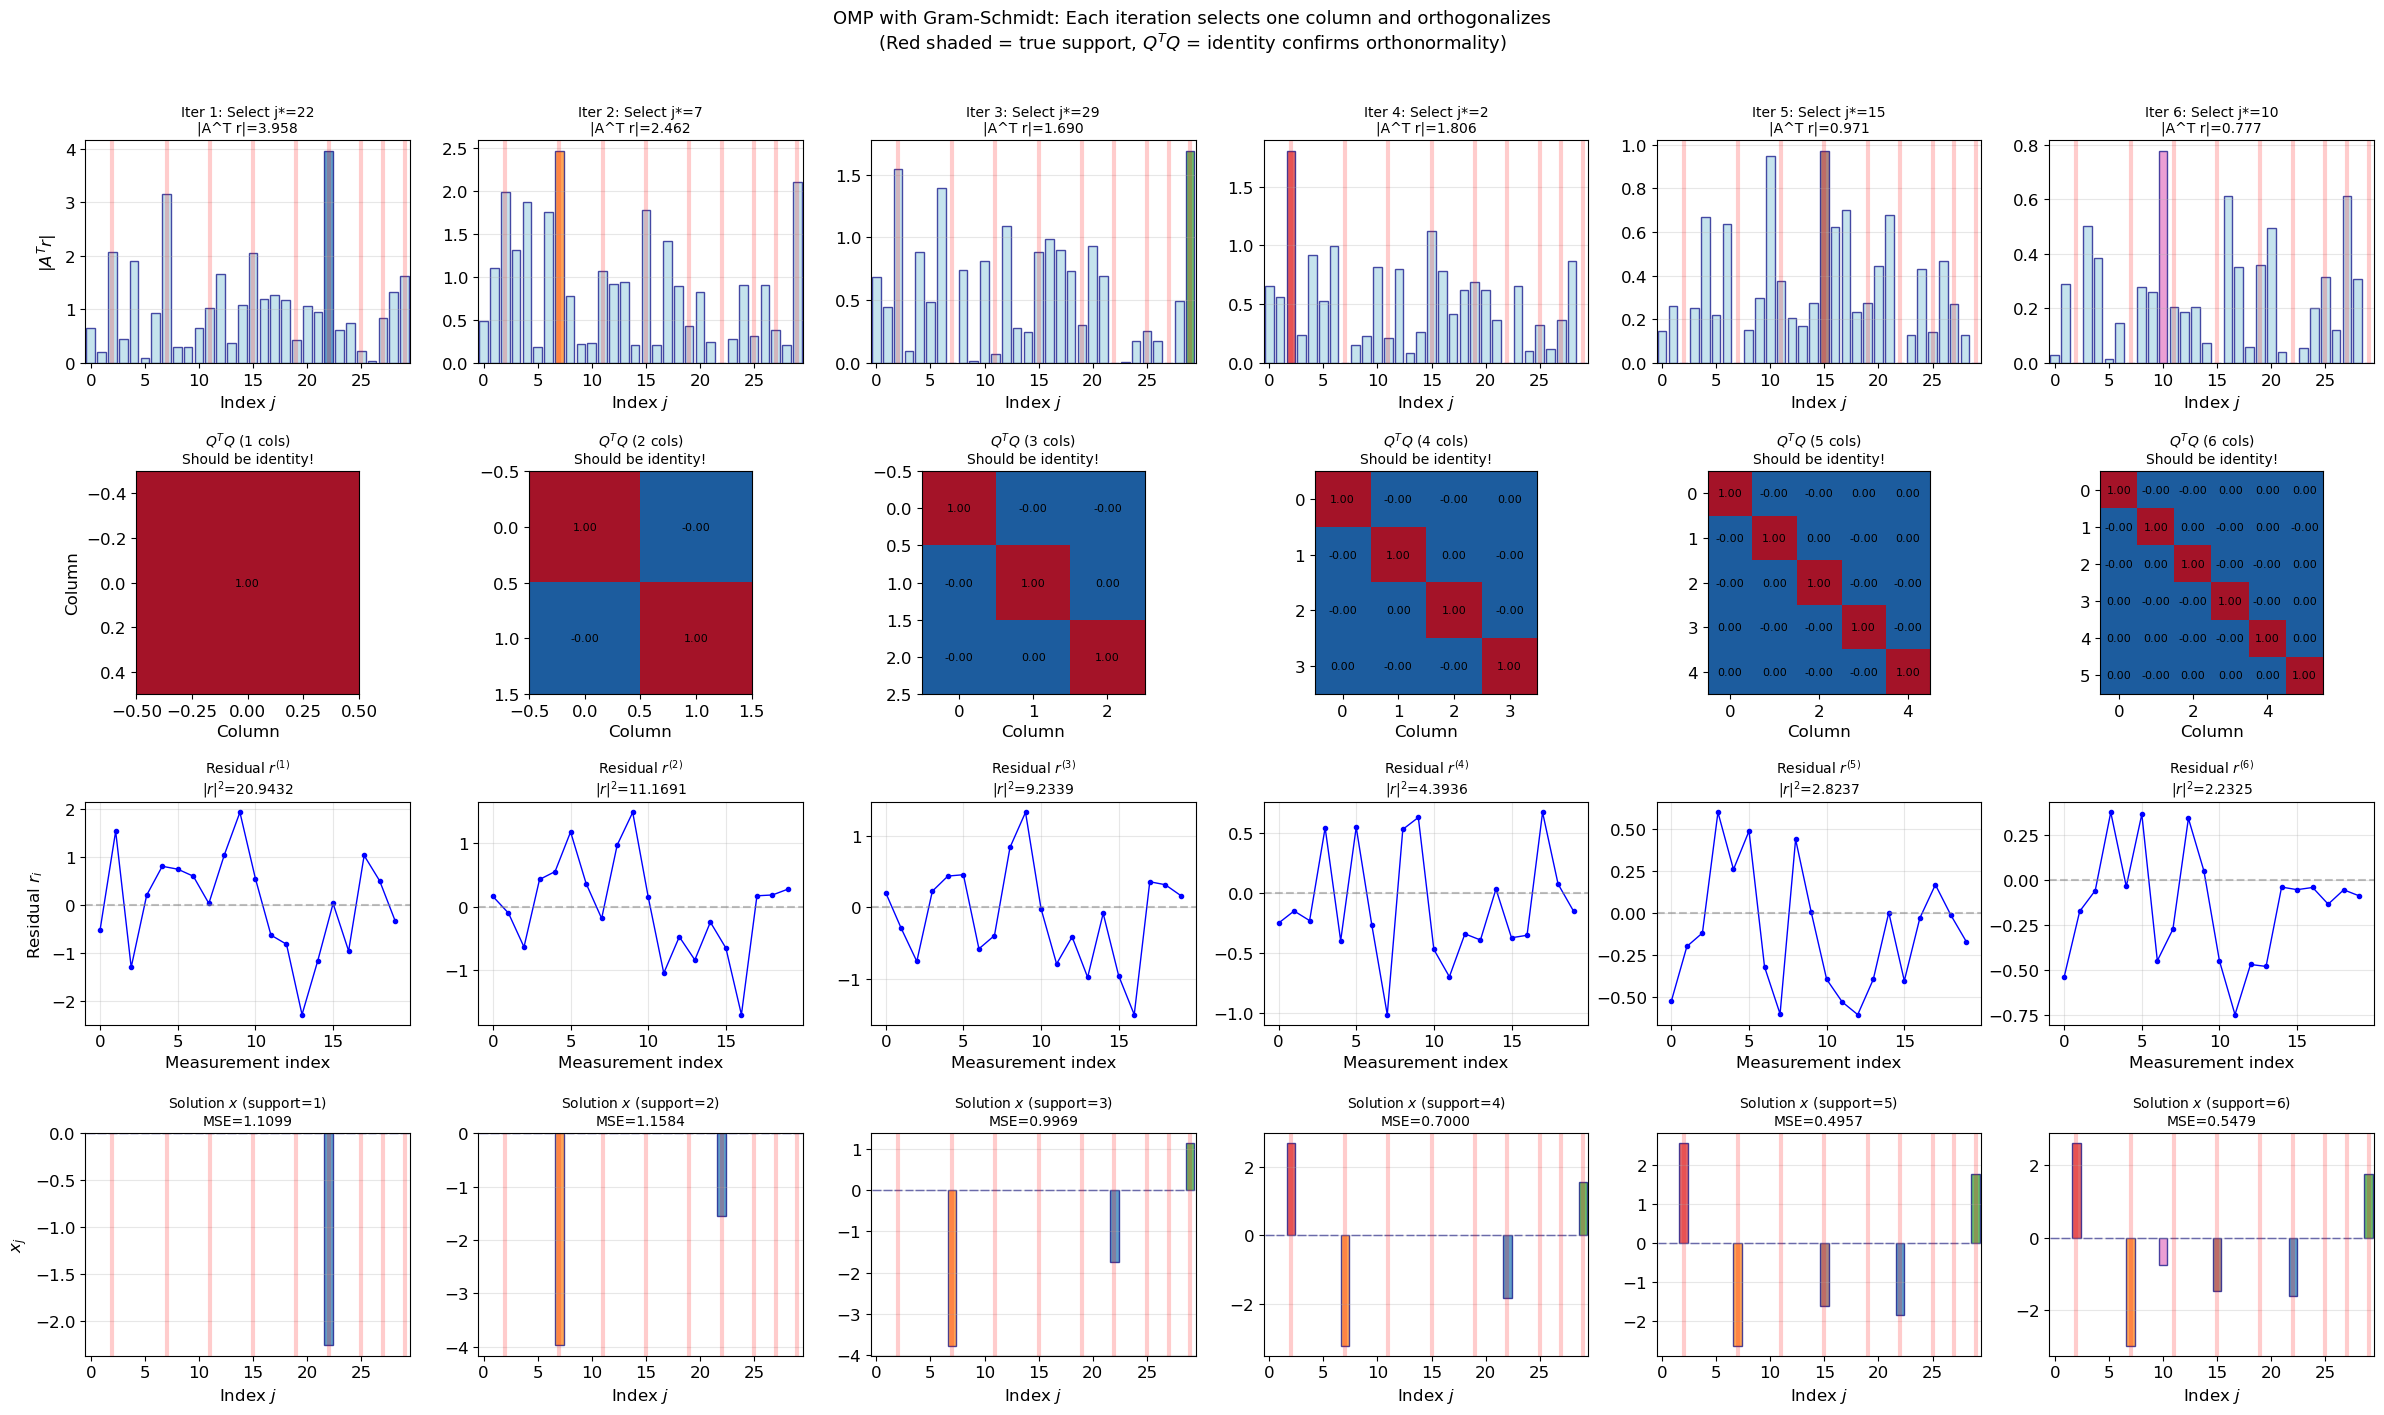

In [21]:
# ============================================================
# Visualize OMP with Gram-Schmidt step by step
# ============================================================

n_omp_steps = min(6, len(omp_history['selected_this_step']))  # Show first 6 iterations
fig, axes = plt.subplots(4, n_omp_steps, figsize=(4*n_omp_steps, 14))

step_colors = plt.cm.tab10(np.linspace(0, 1, k_true))

for col in range(n_omp_steps):
    step = col
    
    # === Row 0: Show correlations |A^T * r| and which one we pick ===
    ax = axes[0, col]
    corr = omp_history['correlations'][step].copy()
    corr_plot = np.where(corr == -np.inf, 0, corr)
    
    selected_this_step = omp_history['selected_this_step'][step]
    already_selected = omp_history['support'][step]
    
    colors = []
    for i in range(n_fwd):
        if i == selected_this_step:
            colors.append(step_colors[step])
        elif i in already_selected:
            colors.append('gray')
        else:
            colors.append('lightblue')
    
    ax.bar(range(n_fwd), corr_plot, color=colors, edgecolor='navy', alpha=0.7)
    
    # Mark true support
    for idx in true_support_fwd:
        ax.axvline(idx, color='red', alpha=0.2, linewidth=3)
    
    ax.set_title(f'Iter {step+1}: Select j*={selected_this_step}\n|A^T r|={corr_plot[selected_this_step]:.3f}', 
                 fontsize=10)
    ax.set_xlabel('Index $j$')
    if col == 0:
        ax.set_ylabel('$|A^T r|$')
    ax.set_xlim(-0.5, n_fwd-0.5)
    ax.grid(True, alpha=0.3, axis='y')
    
    # === Row 1: Show orthonormal basis Q growth ===
    ax = axes[1, col]
    Q_current = omp_history['Q'][step + 1]
    
    # Visualize Q^T Q to show orthonormality
    if Q_current.shape[1] > 0:
        QtQ = Q_current.T @ Q_current
        im = ax.imshow(QtQ, cmap='RdBu_r', vmin=-0.1, vmax=1.1, aspect='equal')
        ax.set_title(f'$Q^T Q$ ({Q_current.shape[1]} cols)\nShould be identity!', fontsize=10)
        ax.set_xlabel('Column')
        if col == 0:
            ax.set_ylabel('Column')
        
        # Add text annotations
        for i in range(QtQ.shape[0]):
            for j in range(QtQ.shape[1]):
                ax.text(j, i, f'{QtQ[i,j]:.2f}', ha='center', va='center', fontsize=8)
    else:
        ax.text(0.5, 0.5, 'Empty', ha='center', va='center', transform=ax.transAxes)
        ax.set_title('Q^T Q', fontsize=10)
    
    # === Row 2: Show residual ===
    ax = axes[2, col]
    residual = omp_history['residual'][step + 1]
    ax.plot(residual, 'b-o', markersize=3, linewidth=1)
    ax.axhline(0, color='gray', linestyle='--', alpha=0.5)
    res_norm = np.linalg.norm(residual)**2
    ax.set_title(f'Residual $r^{{({step+1})}}$\n$\\|r\\|^2$={res_norm:.4f}', fontsize=10)
    ax.set_xlabel('Measurement index')
    if col == 0:
        ax.set_ylabel('Residual $r_i$')
    ax.grid(True, alpha=0.3)
    
    # === Row 3: Current solution x ===
    ax = axes[3, col]
    x_current = omp_history['x'][step + 1]
    
    colors_x = []
    for i in range(n_fwd):
        if np.abs(x_current[i]) > 1e-10:
            # Find which step selected this
            for s_idx, s_selected in enumerate(omp_history['selected_this_step'][:step+1]):
                if i == s_selected:
                    colors_x.append(step_colors[s_idx])
                    break
        else:
            colors_x.append('lightgray')
    
    ax.bar(range(n_fwd), x_current, color=colors_x, edgecolor='navy', alpha=0.7)
    
    # Mark true support
    for idx in true_support_fwd:
        ax.axvline(idx, color='red', alpha=0.2, linewidth=3)
    
    mse = np.mean((x_true_fwd - x_current)**2)
    ax.set_title(f'Solution $x$ (support={step+1})\nMSE={mse:.4f}', fontsize=10)
    ax.set_xlabel('Index $j$')
    if col == 0:
        ax.set_ylabel('$x_j$')
    ax.set_xlim(-0.5, n_fwd-0.5)
    ax.grid(True, alpha=0.3, axis='y')

plt.suptitle('OMP with Gram-Schmidt: Each iteration selects one column and orthogonalizes\n' +
             '(Red shaded = true support, $Q^T Q$ = identity confirms orthonormality)', 
             fontsize=13, y=1.01)
plt.tight_layout()
plt.show()

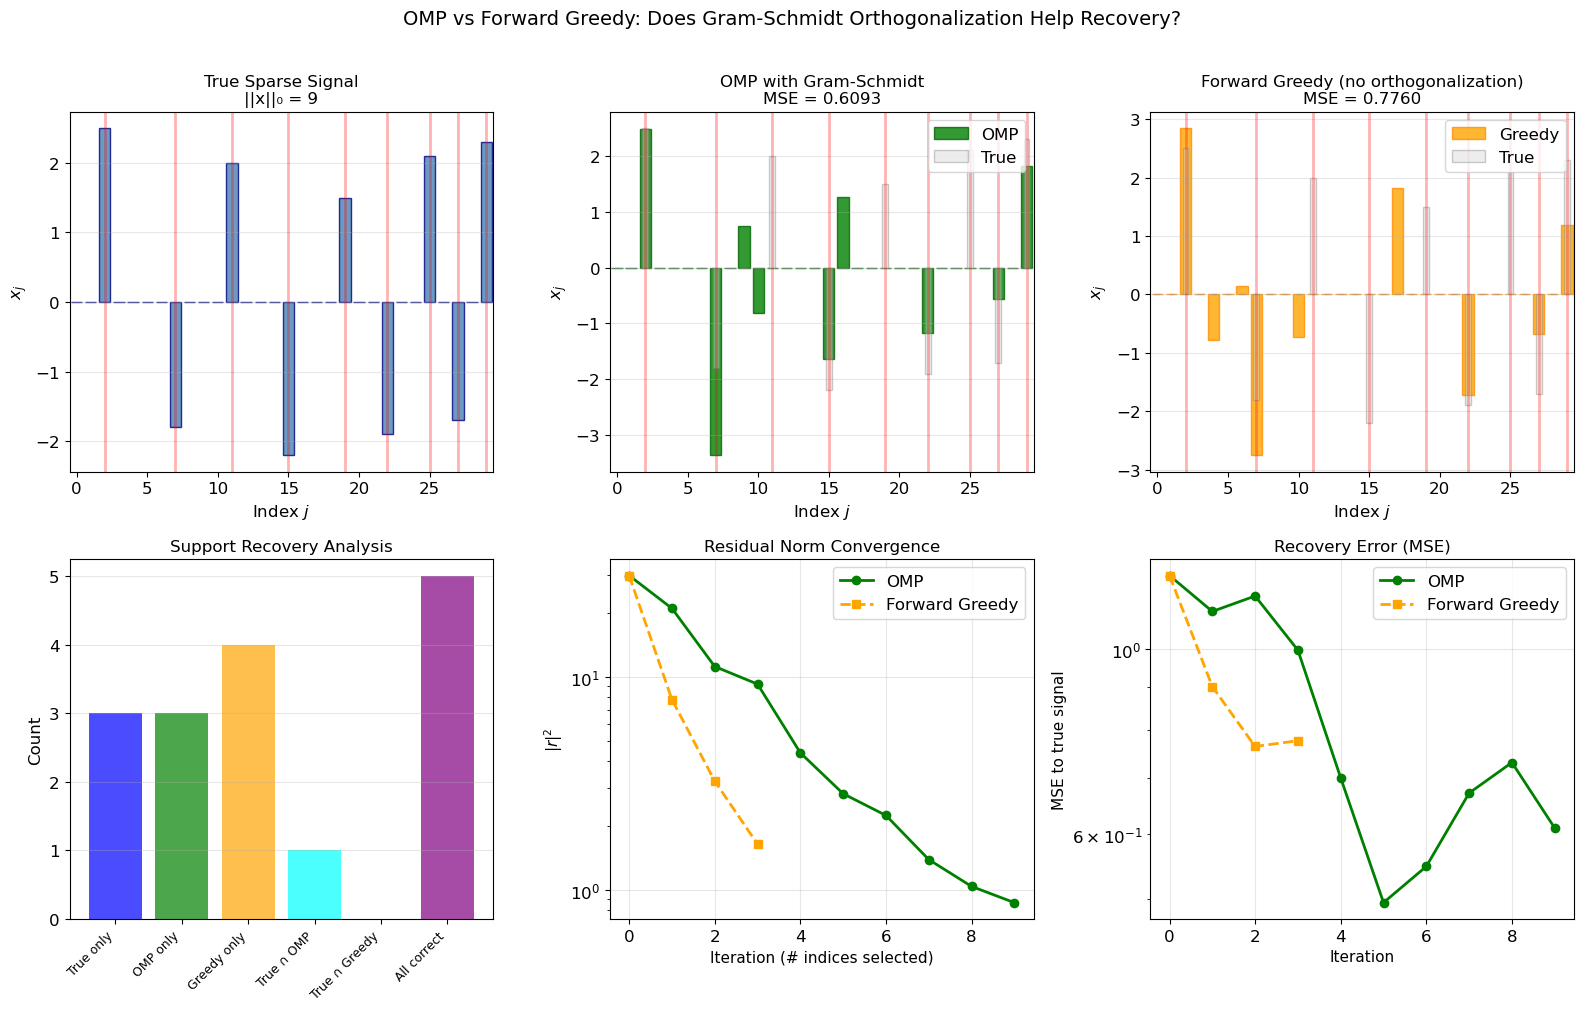


RECOVERY COMPARISON SUMMARY
True support:     [2, 7, 11, 15, 19, 22, 25, 27, 29]
OMP support:      [2, 7, 9, 10, 15, 16, 22, 27, 29] ✗ Mismatch
Greedy support:   [2, 4, 6, 7, 10, 17, 22, 27, 29] ✗ Mismatch
----------------------------------------------------------------------
OMP MSE:          0.609322
Greedy MSE:       0.776036
Improvement:      21.5% lower MSE with OMP


In [22]:
# ============================================================
# Compare OMP Recovery vs True Signal and Forward Greedy
# ============================================================

fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Row 1: True signal, OMP result, Forward Greedy result
# Panel 1: True signal
ax = axes[0, 0]
ax.bar(range(n_fwd), x_true_fwd, color='steelblue', edgecolor='navy', alpha=0.8)
for idx in true_support_fwd:
    ax.axvline(idx, color='red', alpha=0.3, linewidth=2)
ax.set_title(f'True Sparse Signal\n||x||₀ = {k_true}', fontsize=12)
ax.set_xlabel('Index $j$')
ax.set_ylabel('$x_j$')
ax.set_xlim(-0.5, n_fwd-0.5)
ax.grid(True, alpha=0.3, axis='y')

# Panel 2: OMP recovery
ax = axes[0, 1]
x_omp_final = omp_history['x'][-1]
ax.bar(range(n_fwd), x_omp_final, color='green', edgecolor='darkgreen', alpha=0.8, label='OMP')
ax.bar(range(n_fwd), x_true_fwd, color='lightgray', edgecolor='gray', alpha=0.4, width=0.4, label='True')
for idx in true_support_fwd:
    ax.axvline(idx, color='red', alpha=0.3, linewidth=2)
mse_omp = np.mean((x_true_fwd - x_omp_final)**2)
ax.set_title(f'OMP with Gram-Schmidt\nMSE = {mse_omp:.4f}', fontsize=12)
ax.set_xlabel('Index $j$')
ax.set_ylabel('$x_j$')
ax.set_xlim(-0.5, n_fwd-0.5)
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3, axis='y')

# Panel 3: Forward Greedy recovery (from previous section)
ax = axes[0, 2]
x_greedy_final = greedy_history['x'][-1]
ax.bar(range(n_fwd), x_greedy_final, color='orange', edgecolor='darkorange', alpha=0.8, label='Greedy')
ax.bar(range(n_fwd), x_true_fwd, color='lightgray', edgecolor='gray', alpha=0.4, width=0.4, label='True')
for idx in true_support_fwd:
    ax.axvline(idx, color='red', alpha=0.3, linewidth=2)
mse_greedy = np.mean((x_true_fwd - x_greedy_final)**2)
ax.set_title(f'Forward Greedy (no orthogonalization)\nMSE = {mse_greedy:.4f}', fontsize=12)
ax.set_xlabel('Index $j$')
ax.set_ylabel('$x_j$')
ax.set_xlim(-0.5, n_fwd-0.5)
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3, axis='y')

# Row 2: Analysis plots
# Panel 4: Support comparison
ax = axes[1, 0]
true_set = set(true_support_fwd)
omp_set = set(np.where(np.abs(x_omp_final) > 1e-10)[0])
greedy_set = set(np.where(np.abs(x_greedy_final) > 1e-10)[0])

# Venn-like bar representation
categories = ['True only', 'OMP only', 'Greedy only', 'True ∩ OMP', 'True ∩ Greedy', 'All correct']
true_only = true_set - omp_set - greedy_set
omp_only = omp_set - true_set
greedy_only = greedy_set - true_set
true_omp = true_set & omp_set - greedy_set
true_greedy = true_set & greedy_set - omp_set
all_correct = true_set & omp_set & greedy_set

bars_data = [len(true_only), len(omp_only), len(greedy_only), 
             len(true_omp), len(true_greedy), len(all_correct)]
bar_colors = ['blue', 'green', 'orange', 'cyan', 'yellow', 'purple']
ax.bar(range(len(categories)), bars_data, color=bar_colors, alpha=0.7)
ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories, rotation=45, ha='right', fontsize=9)
ax.set_ylabel('Count')
ax.set_title('Support Recovery Analysis', fontsize=12)
ax.grid(True, alpha=0.3, axis='y')

# Panel 5: Residual convergence comparison
ax = axes[1, 1]
ax.semilogy(omp_history['residual_norm'], 'g-o', linewidth=2, markersize=6, label='OMP')
ax.semilogy(greedy_history['residual_norm'], 'orange', linestyle='--', marker='s', 
            linewidth=2, markersize=6, label='Forward Greedy')
ax.set_xlabel('Iteration (# indices selected)', fontsize=11)
ax.set_ylabel('$\\|r\\|^2$', fontsize=11)
ax.set_title('Residual Norm Convergence', fontsize=12)
ax.legend()
ax.grid(True, alpha=0.3)

# Panel 6: MSE evolution
ax = axes[1, 2]
omp_mses = [np.mean((x_true_fwd - x)**2) for x in omp_history['x']]
greedy_mses = [np.mean((x_true_fwd - x)**2) for x in greedy_history['x']]
ax.semilogy(omp_mses, 'g-o', linewidth=2, markersize=6, label='OMP')
ax.semilogy(greedy_mses, 'orange', linestyle='--', marker='s', linewidth=2, markersize=6, label='Forward Greedy')
ax.set_xlabel('Iteration', fontsize=11)
ax.set_ylabel('MSE to true signal', fontsize=11)
ax.set_title('Recovery Error (MSE)', fontsize=12)
ax.legend()
ax.grid(True, alpha=0.3)

plt.suptitle('OMP vs Forward Greedy: Does Gram-Schmidt Orthogonalization Help Recovery?', 
             fontsize=14, y=1.01)
plt.tight_layout()
plt.show()

# Print summary
print("\n" + "="*70)
print("RECOVERY COMPARISON SUMMARY")
print("="*70)
print(f"True support:     {sorted(true_support_fwd)}")
print(f"OMP support:      {sorted(omp_set)} {'✓ EXACT MATCH!' if omp_set == true_set else '✗ Mismatch'}")
print(f"Greedy support:   {sorted(greedy_set)} {'✓ EXACT MATCH!' if greedy_set == true_set else '✗ Mismatch'}")
print("-"*70)
print(f"OMP MSE:          {mse_omp:.6f}")
print(f"Greedy MSE:       {mse_greedy:.6f}")
print(f"Improvement:      {(mse_greedy - mse_omp)/mse_greedy*100:.1f}% lower MSE with OMP" 
      if mse_omp < mse_greedy else f"Greedy was {(mse_omp - mse_greedy)/mse_omp*100:.1f}% better")
print("="*70)

### Key Insights: Why Gram-Schmidt Orthogonalization Improves Recovery

**The Problem with Simple Greedy Selection:**
- Selects columns based on correlation with residual
- But the residual may still have components along previously selected columns
- Correlated columns can "steal" signal from each other
- May select wrong indices early, leading to suboptimal support

**How OMP with Gram-Schmidt Fixes This:**

1. **Orthogonal Residuals**: After each selection, the residual $r^{(t)}$ is orthogonal to the span of all selected columns:
   $$r^{(t)} \perp \text{span}\{a_{j_1}, a_{j_2}, \ldots, a_{j_t}\}$$

2. **True Independence**: Each new column selection is based on information **not already captured** by previous selections

3. **Optimal Coefficients**: Since $Q$ has orthonormal columns, the least squares solution is simply:
   $$x_S = R^{-1} Q^T y$$
   where $A_S = QR$

**When Does This Matter Most?**
- **High column coherence**: When columns of $A$ are correlated (e.g., $a_i^T a_j$ is large)
- **Noisy measurements**: Orthogonalization helps distinguish true signal from noise artifacts
- **Underdetermined systems**: When $m < n$ (more unknowns than measurements)

**Formal Guarantee (RIP):**
Under the Restricted Isometry Property, OMP with Gram-Schmidt recovers the exact sparse support in $k$ iterations if the signal is sufficiently sparse relative to the coherence of $A$.

In [23]:
def hard_threshold(x, k):
    """Keep only the k largest magnitude entries"""
    x_thresh = np.zeros_like(x)
    idx = np.argsort(np.abs(x))[-k:]  # Indices of k largest
    x_thresh[idx] = x[idx]
    return x_thresh

def IHT(A, y, k, max_iter=100, step_size=None):
    """Iterative Hard Thresholding algorithm"""
    m, n = A.shape
    x = np.zeros(n)
    
    if step_size is None:
        # Step size based on largest eigenvalue of A^T A
        step_size = 1.0 / np.linalg.norm(A, 2)**2
    
    history = [x.copy()]
    objectives = [np.sum((y - A @ x)**2)]
    
    for _ in range(max_iter):
        # Gradient step
        gradient = -2 * A.T @ (y - A @ x)
        x = x - step_size * gradient
        
        # Hard threshold to enforce sparsity
        x = hard_threshold(x, k)
        
        history.append(x.copy())
        objectives.append(np.sum((y - A @ x)**2))
    
    return x, history, objectives

# Run IHT
x_iht, iht_history, iht_objectives = IHT(A, y, k=5, max_iter=100)

print(f"IHT Recovery:")
print(f"  Non-zeros: {np.sum(np.abs(x_iht) > 1e-10)}")
print(f"  MSE: {np.mean((x_true - x_iht)**2):.4f}")
print(f"  Correct support recovered: {set(np.where(np.abs(x_iht) > 1e-10)[0]) == set(support)}")

IHT Recovery:
  Non-zeros: 5
  MSE: 0.0018
  Correct support recovered: True


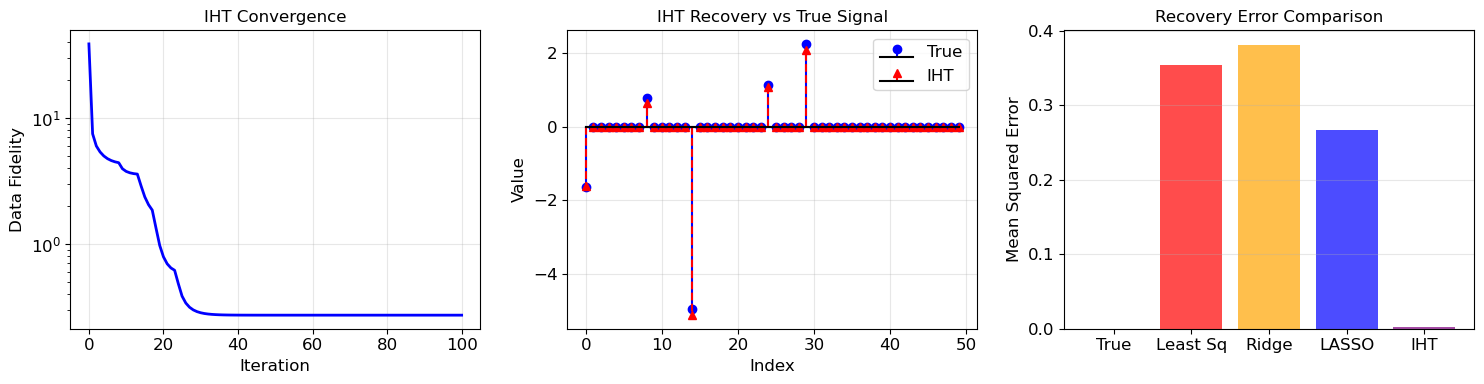

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Convergence
ax = axes[0]
ax.semilogy(iht_objectives, 'b-', linewidth=2)
ax.set_xlabel('Iteration')
ax.set_ylabel('Data Fidelity')
ax.set_title('IHT Convergence', fontsize=12)
ax.grid(True, alpha=0.3)

# True vs IHT
ax = axes[1]
ax.stem(range(n), x_true, linefmt='b-', markerfmt='bo', basefmt='k-', label='True')
ax.stem(range(n), x_iht, linefmt='r--', markerfmt='r^', basefmt='k-', label='IHT')
ax.set_title('IHT Recovery vs True Signal', fontsize=12)
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.legend()
ax.grid(True, alpha=0.3)

# Comparison of all methods
ax = axes[2]
methods = ['True', 'Least Sq', 'Ridge', 'LASSO', 'IHT']
mses = [
    0,
    np.mean((x_true - x_ls)**2),
    np.mean((x_true - x_ridge)**2),
    np.mean((x_true - x_lasso)**2),
    np.mean((x_true - x_iht)**2)
]
colors = ['green', 'red', 'orange', 'blue', 'purple']
bars = ax.bar(methods, mses, color=colors, alpha=0.7)
ax.set_ylabel('Mean Squared Error')
ax.set_title('Recovery Error Comparison', fontsize=12)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 9. Key Takeaways

1. **L0 Problem**: $\min_x \|y - Ax\|_2^2 + \lambda \|x\|_0$ directly promotes sparsity but is **NP-hard** due to:
   - Non-convexity
   - Discontinuities at coordinate hyperplanes

2. **L1 Relaxation (LASSO)**: $\min_x \|y - Ax\|_2^2 + \lambda \|x\|_1$ is convex and often produces sparse solutions
   - The "corners" of the L1 ball lie on axes, promoting sparsity
   - Under certain conditions (RIP), L1 recovers the same solution as L0

3. **Greedy Algorithms (IHT, OMP)**: Directly tackle L0 with guarantees under certain conditions

4. **λ Trade-off**: Higher λ → more sparsity, potentially worse fit to data

In [25]:
# Final summary visualization
print("="*60)
print("SUMMARY: L0 Sparse Optimization")
print("="*60)
print("\nProblem: min_x ||y - Ax||² + λ ||x||₀")
print("\nKey challenges:")
print("  • L0 is discontinuous (step function)")
print("  • Non-convex optimization (NP-hard)")
print("  • Combinatorial: need to search 2^n subsets")
print("\nSolutions:")
print("  • L1 relaxation (LASSO) - convex, tractable")
print("  • Greedy methods (IHT, OMP) - fast, often effective")
print("  • Bayesian approaches - probabilistic sparsity priors")
print("="*60)

SUMMARY: L0 Sparse Optimization

Problem: min_x ||y - Ax||² + λ ||x||₀

Key challenges:
  • L0 is discontinuous (step function)
  • Non-convex optimization (NP-hard)
  • Combinatorial: need to search 2^n subsets

Solutions:
  • L1 relaxation (LASSO) - convex, tractable
  • Greedy methods (IHT, OMP) - fast, often effective
  • Bayesian approaches - probabilistic sparsity priors
